**SET UP**

In [ ]:
# LIBRAIRIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# DATA

df_cotonou = pd.read_csv('cotonou_clean.csv')
df_ottawa = pd.read_csv('ottawa_clean.csv',encoding='iso-8859-1')
df_parakou = pd.read_csv('parakou_clean.csv')
df_plaisance = pd.read_csv('plaisance_clean.csv')
df_vacoas = pd.read_csv('vacoas_clean.csv')
df_vancouver = pd.read_csv('vancouver_clean.csv', encoding='iso-8859-1')

---

----

**OTTAWA**

In [ ]:
# SUMMARY STATISTICS

# Columns for Ottawa
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

df_city = df_ottawa[num_cols]

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_ottawa = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_ottawa = summary_ottawa[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_ottawa.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_ottawa['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_ottawa = summary_ottawa.round(2)

summary_ottawa

count   mean    Q1  median     Q3   min    max  \
Max Temp (°C)           1827.0  12.80   2.4    14.0  23.55 -20.1   36.9   
Min Temp (°C)           1827.0   2.23  -5.2     2.5  11.60 -33.1   23.2   
Mean Temp (°C)          1827.0   7.53  -1.2     8.1  17.55 -26.6   28.9   
Total Precip (mm)       1827.0   2.50   0.0     0.0   1.80   0.0   57.9   
Spd of Max Gust (km/h)  1827.0  44.20  37.0    43.0  49.00  31.0  120.0   
Total Snow (cm)         1827.0   0.57   0.0     0.0   0.00   0.0   47.8   

                          std    10%    90%    IQR  
Max Temp (°C)           12.22  -3.54  28.14  21.15  
Min Temp (°C)           10.86 -12.64  15.94  16.80  
Mean Temp (°C)          11.39  -8.10  21.80  18.75  
Total Precip (mm)        6.09   0.00   7.80   1.80  
Spd of Max Gust (km/h)  10.09  33.00  58.00  12.00  
Total Snow (cm)          2.54   0.00   0.60   0.00

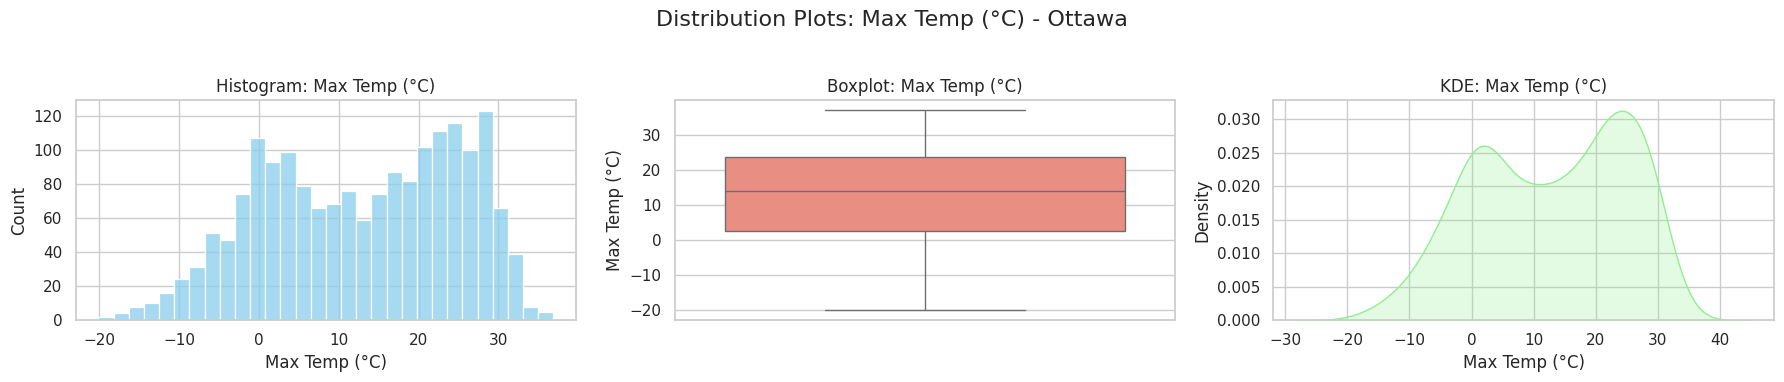

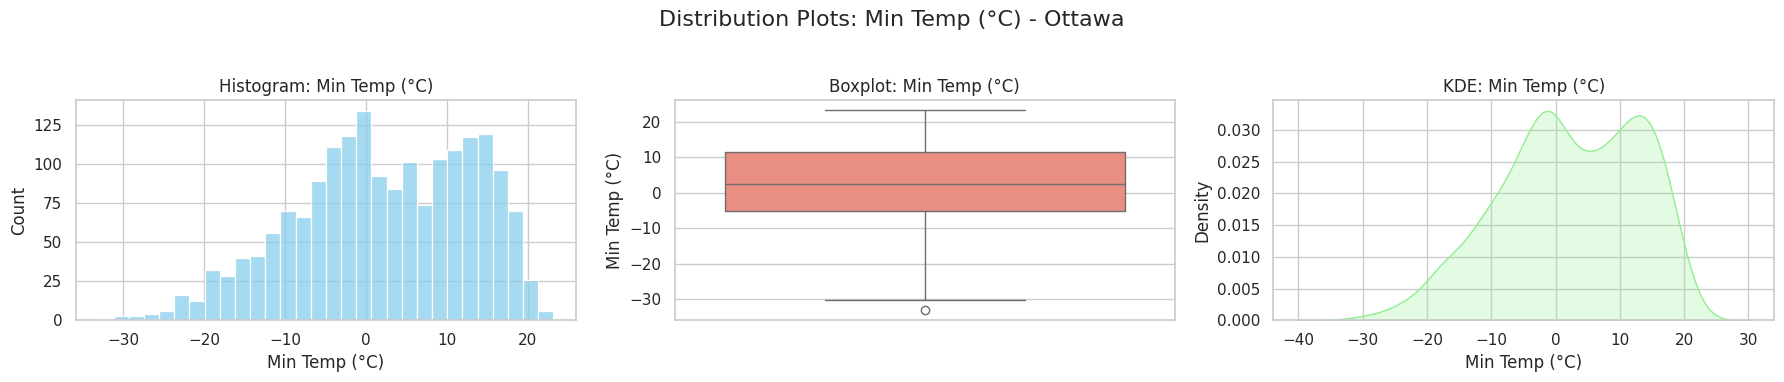

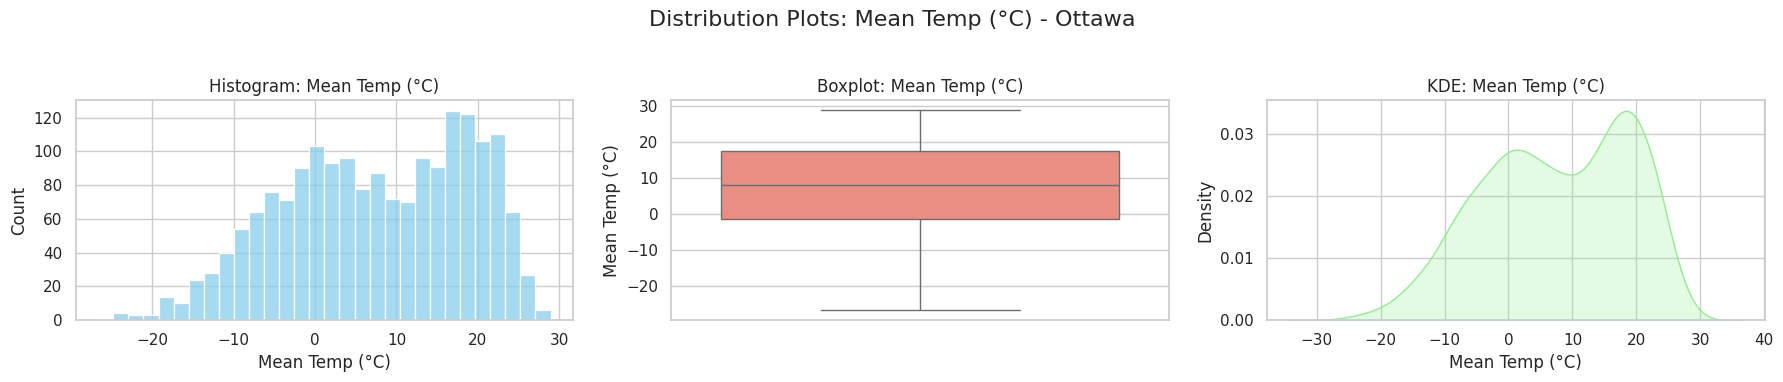

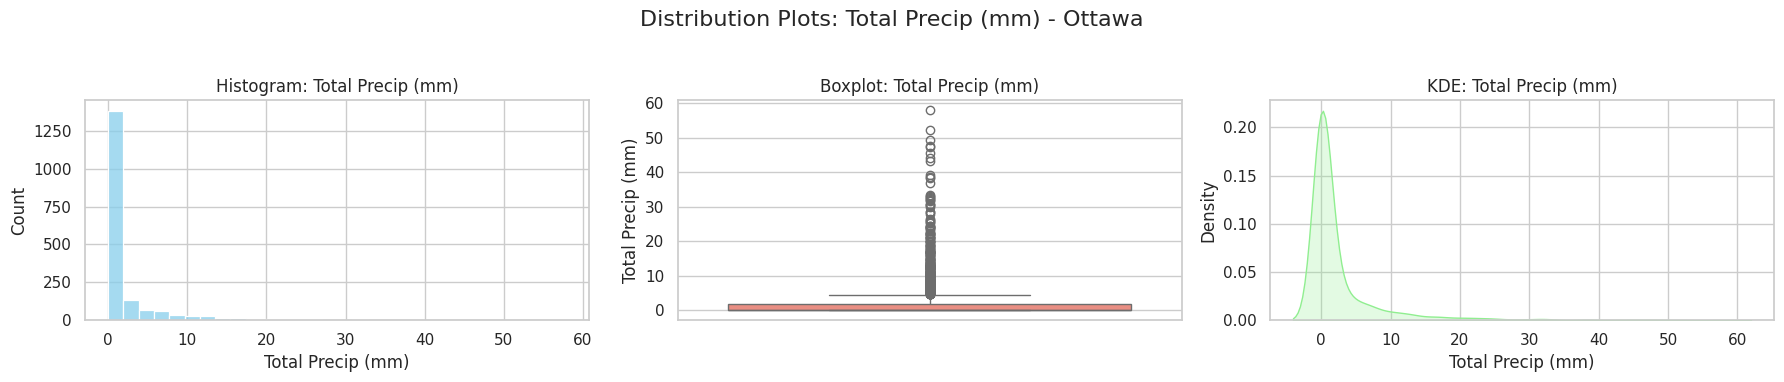

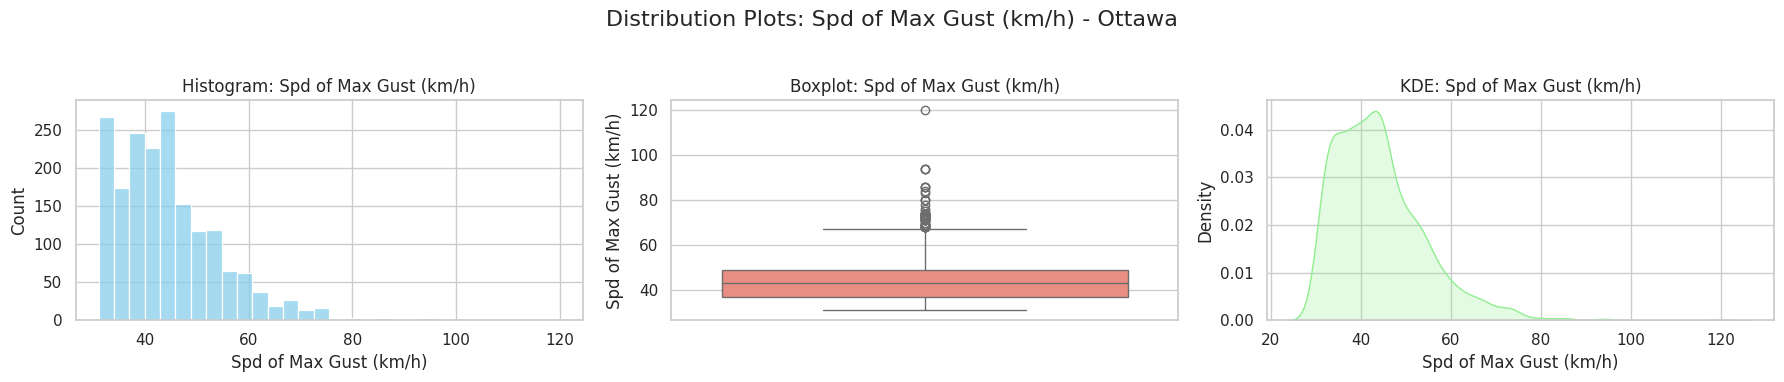

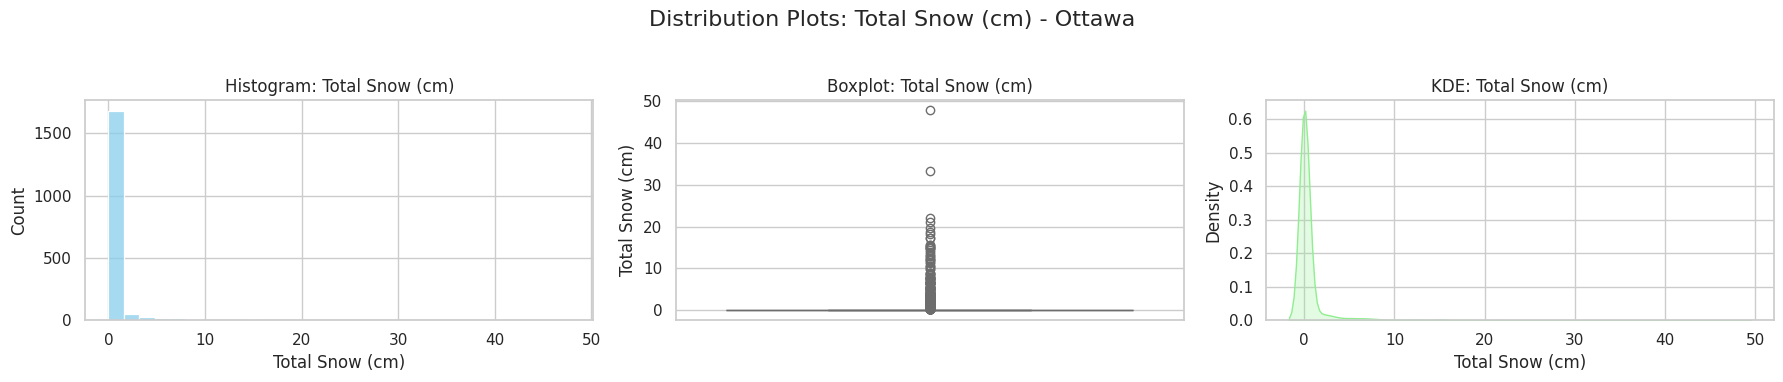

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Ottawa)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Ottawa", fontsize=16)

    # Histogram
    sns.histplot(df_ottawa[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_ottawa[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_ottawa[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

KeyboardInterrupt: 

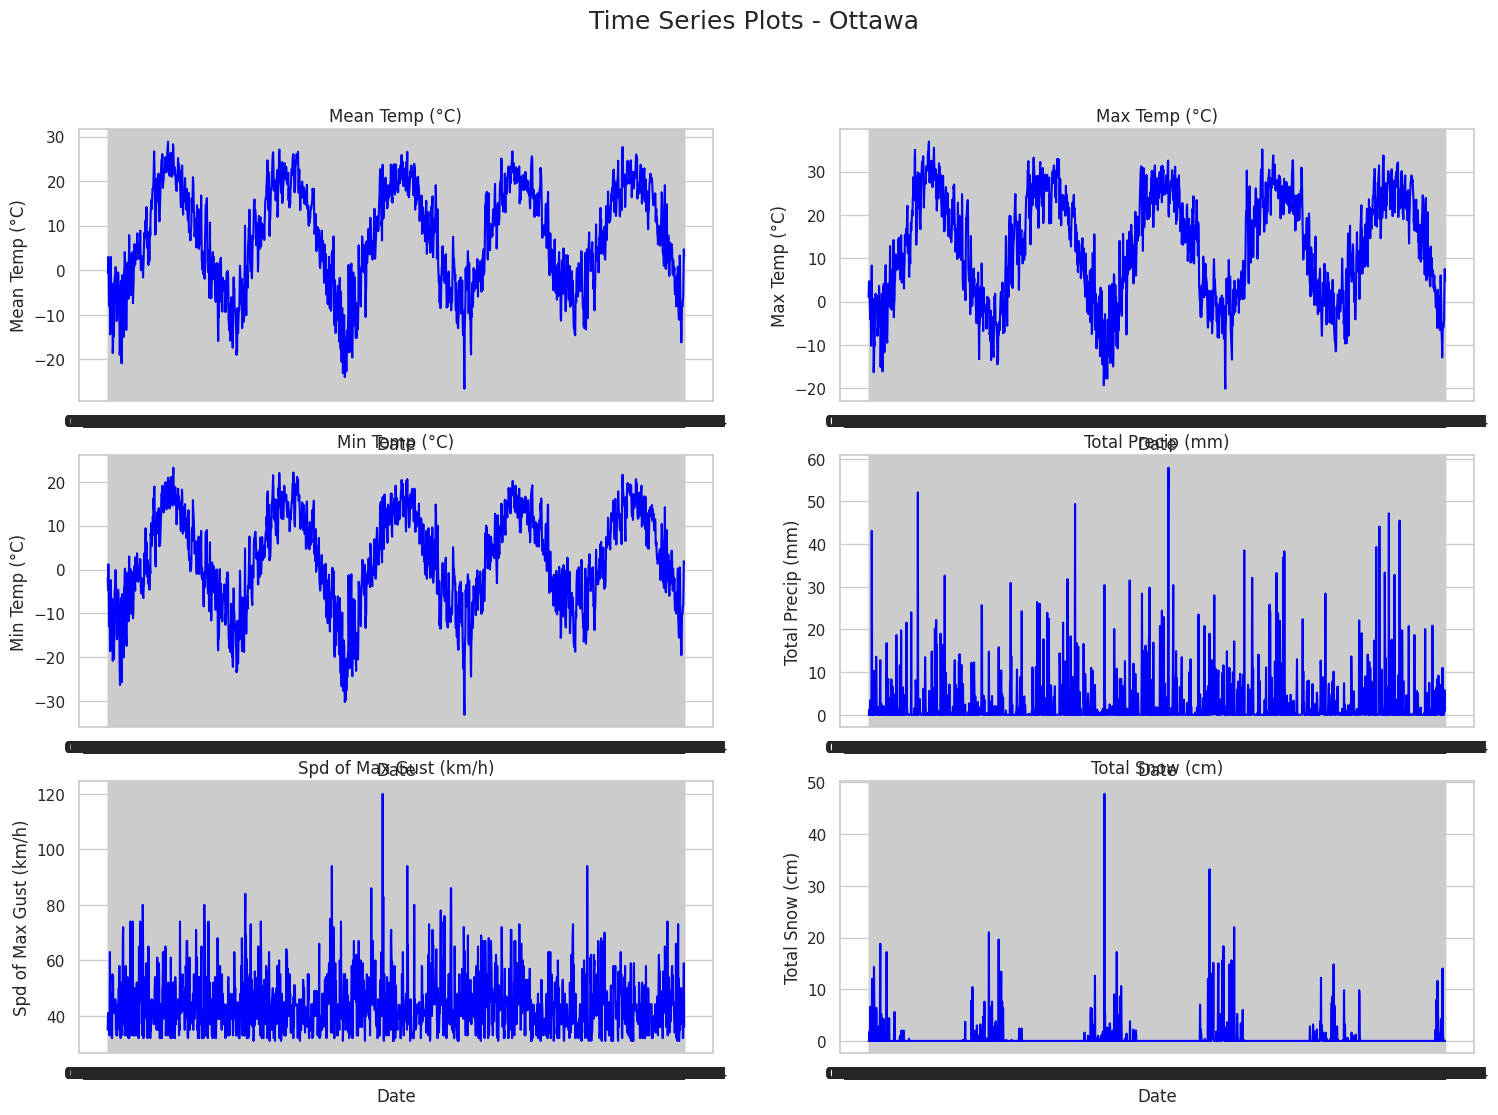

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Ottawa", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_ottawa['Date'], df_ottawa[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Snow (cm)', 'Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_ottawa = df_ottawa.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_ottawa.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_ottawa.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_ottawa = monthly_agg_ottawa.reset_index()

# Round numeric columns for readability
monthly_agg_ottawa[monthly_agg_ottawa.columns[2:]] = monthly_agg_ottawa.iloc[:, 2:].round(2)

monthly_agg_ottawa

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020      1              -2.58             -10.14               -6.37   
1   2020      2              -2.07             -11.96               -7.03   
2   2020      3               4.19              -4.44               -0.12   
3   2020      4              10.03              -1.34                4.37   
4   2020      5              19.14               5.33               12.26   
5   2020      6              25.56              12.09               18.86   
6   2020      7              30.51              17.43               23.99   
7   2020      8              25.08              13.77               19.45   
8   2020      9              19.63               7.72               13.70   
9   2020     10              12.66               2.17                7.44   
10  2020     11               8.54              -1.22                3.67   
11  2020     12              -0.25              -7.05               -3.66   
12  2021      1              -4.45             -10.38               -7.43   
13  2021      2              -3.69             -13.61               -8.67   
14  2021      3               5.63              -6.88               -0.62   
15  2021      4              14.31               1.97                8.16   
16  2021      5              19.70               6.61               13.18   
17  2021      6              26.72              14.31               20.53   
18  2021      7              25.25              14.15               19.73   
19  2021      8              27.85              16.62               22.25   
20  2021      9              21.45              10.18               15.84   
21  2021     10              16.02               6.75               11.41   
22  2021     11               5.80              -3.77                1.02   
23  2021     12              -0.13              -8.54               -4.35   
24  2022      1              -8.72             -20.75              -14.76   
25  2022      2              -3.19             -14.79               -9.01   
26  2022      3               3.21              -6.58               -1.70   
27  2022      4              11.38               0.33                5.88   
28  2022      5              22.01               8.16               15.12   
29  2022      6              24.02              12.40               18.24   
30  2022      7              27.02              14.89               20.98   
31  2022      8              26.43              14.94               20.72   
32  2022      9              20.21               9.27               14.76   
33  2022     10              15.60               2.36                9.01   
34  2022     11               8.29              -1.01                3.65   
35  2022     12               0.43              -6.34               -2.97   
36  2023      1              -2.34              -9.25               -5.81   
37  2023      2              -2.38             -13.14               -7.76   
38  2023      3               2.23              -5.41               -1.60   
39  2023      4              13.27               1.71                7.51   
40  2023      5              20.07               5.32               12.72   
41  2023      6              24.78              12.87               18.84   
42  2023      7              27.44              15.93               21.70   
43  2023      8              24.30              12.95               18.65   
44  2023      9              23.30              10.50               16.92   
45  2023     10              15.68               6.75               11.25   
46  2023     11               4.82              -4.28                0.28   
47  2023     12               0.81              -5.16               -2.18   
48  2024      1              -2.81              -9.43               -6.14   
49  2024      2               0.81              -8.50               -3.87   
50  2024      3               7.18              -3.56                1.82   


In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Snow (cm)', 'Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_ottawa = df_ottawa.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_ottawa.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_ottawa.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_ottawa = yearly_agg_ottawa.reset_index()

# Round numeric columns for readability
yearly_agg_ottawa[yearly_agg_ottawa.columns[1:]] = yearly_agg_ottawa.iloc[:, 1:].round(2)

yearly_agg_ottawa

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020              12.58               1.91                7.26   
1  2021              12.96               2.38                7.68   
2  2022              12.31               1.16                6.74   
3  2023              12.75               2.49                7.63   
4  2024              13.41               3.21                8.32   

   Avg Spd of Max Gust (km/h)  Total Total Snow (cm)  Total Total Precip (mm)  
0                       44.36                  190.6                    886.6  
1                       43.32                  176.8                    836.3  
2                       45.20                  263.1                    978.0  
3                       44.47                  260.2                    925.9  
4                       43.67                  156.4                    931.8

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.94            0.99   
Min Temp (°C)                    0.94           1.00            0.98   
Mean Temp (°C)                   0.99           0.98            1.00   
Total Snow (cm)                 -0.27          -0.25           -0.27   
Total Precip (mm)                0.07           0.15            0.11   
Spd of Max Gust (km/h)          -0.04          -0.06           -0.05   

                        Total Snow (cm)  Total Precip (mm)  \
Max Temp (°C)                     -0.27               0.07   
Min Temp (°C)                     -0.25               0.15   
Mean Temp (°C)                    -0.27               0.11   
Total Snow (cm)                    1.00               0.23   
Total Precip (mm)                  0.23               1.00   
Spd of Max Gust (km/h)             0.09               0.17   

                        Spd of Max Gust (km/h)  
Max Temp (°

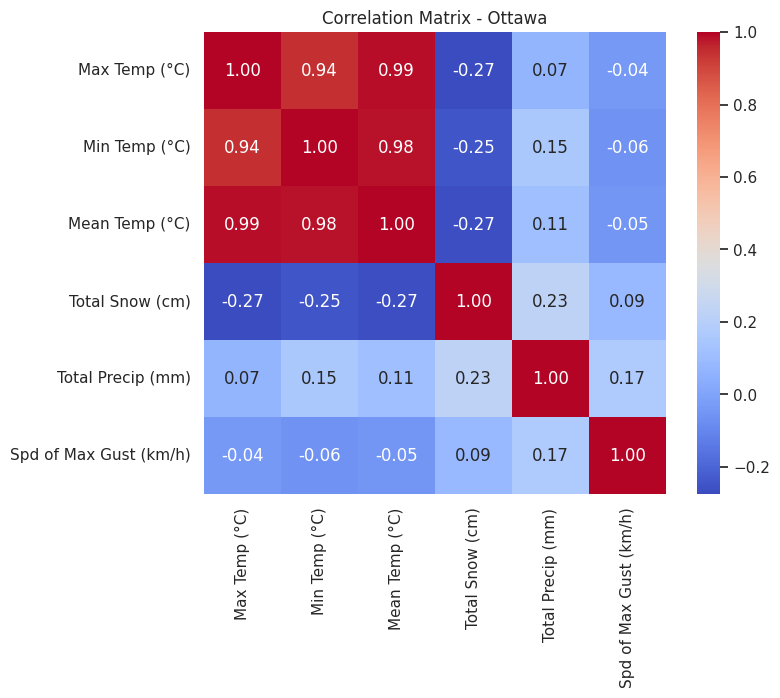

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Snow (cm)', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_ottawa[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Ottawa")
plt.show()

------

----

**VANCOUVER**

In [ ]:
# SUMMARY STATISTICS

# Columns to include
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

# Replace df_city with whichever city's DataFrame you want
df_city = df_vancouver[num_cols]  # e.g., df_ottawa, df_parakou, etc.

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_city = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_city = summary_city[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_city.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_city['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_city = summary_city.round(2)

summary_city

count   mean    Q1  median     Q3   min   max   std  \
Max Temp (°C)           1827.0  14.16   8.8    13.3  19.80  -7.8  32.4  6.68   
Min Temp (°C)           1827.0   7.07   3.0     7.0  11.80 -15.3  20.4  5.72   
Mean Temp (°C)          1827.0  10.64   6.0    10.2  15.75 -11.6  26.4  6.05   
Total Precip (mm)       1827.0   3.07   0.0     0.0   3.30   0.0  67.1  6.46   
Spd of Max Gust (km/h)  1827.0  41.22  35.0    39.0  45.00  31.0  94.0  9.20   
Total Snow (cm)         1827.0   0.13   0.0     0.0   0.00   0.0  27.8  1.28   

                          10%    90%    IQR  
Max Temp (°C)            6.50  23.34  11.00  
Min Temp (°C)           -0.04  14.43   8.80  
Mean Temp (°C)           3.40  18.70   9.75  
Total Precip (mm)        0.00  10.14   3.30  
Spd of Max Gust (km/h)  32.00  54.00  10.00  
Total Snow (cm)          0.00   0.00   0.00

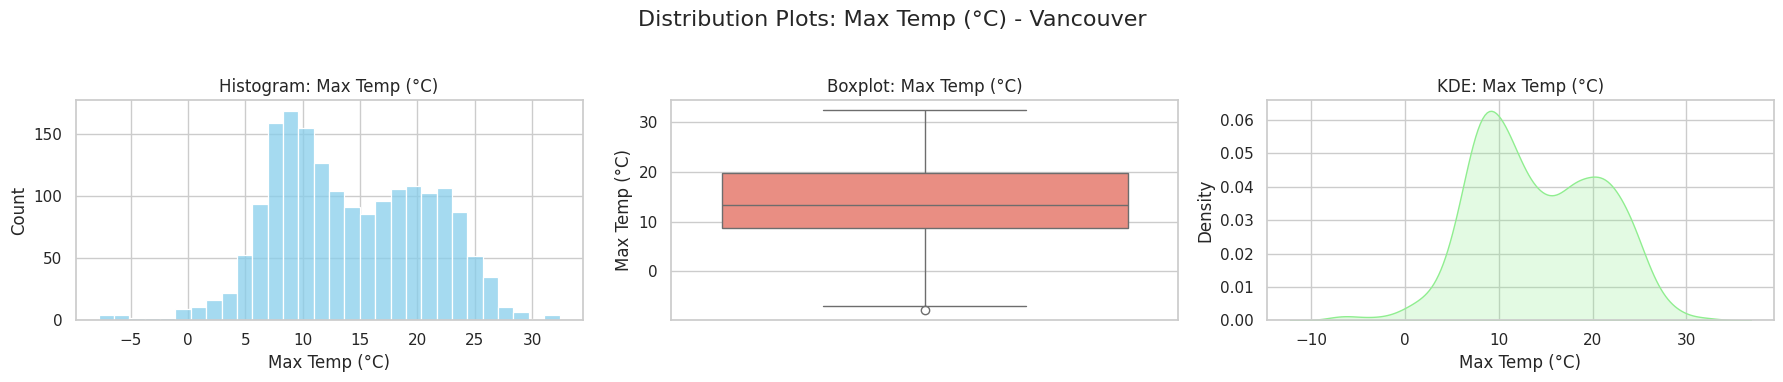

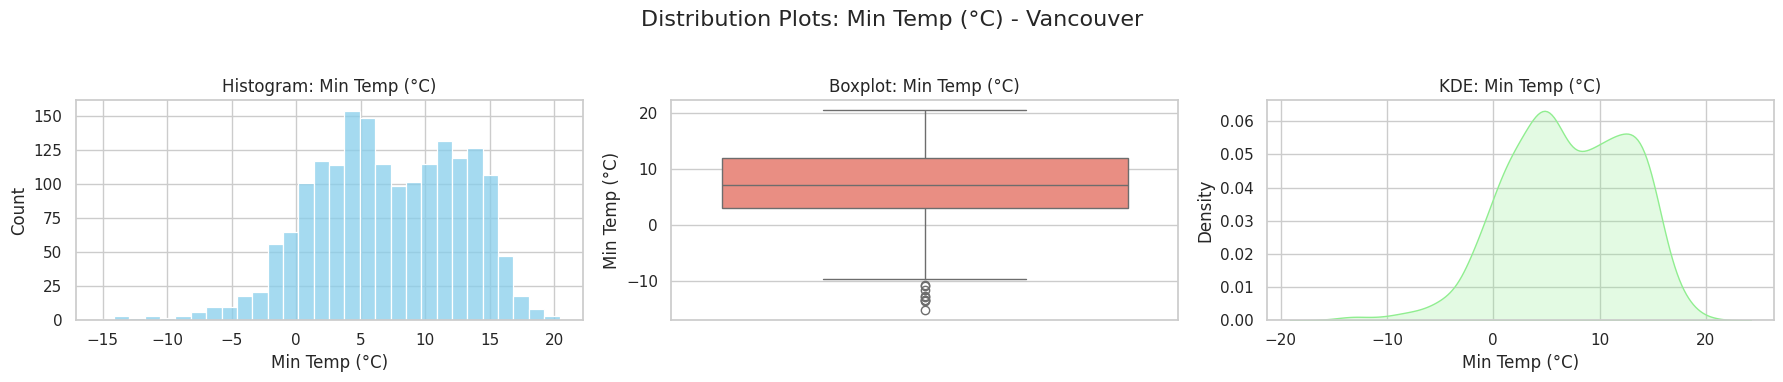

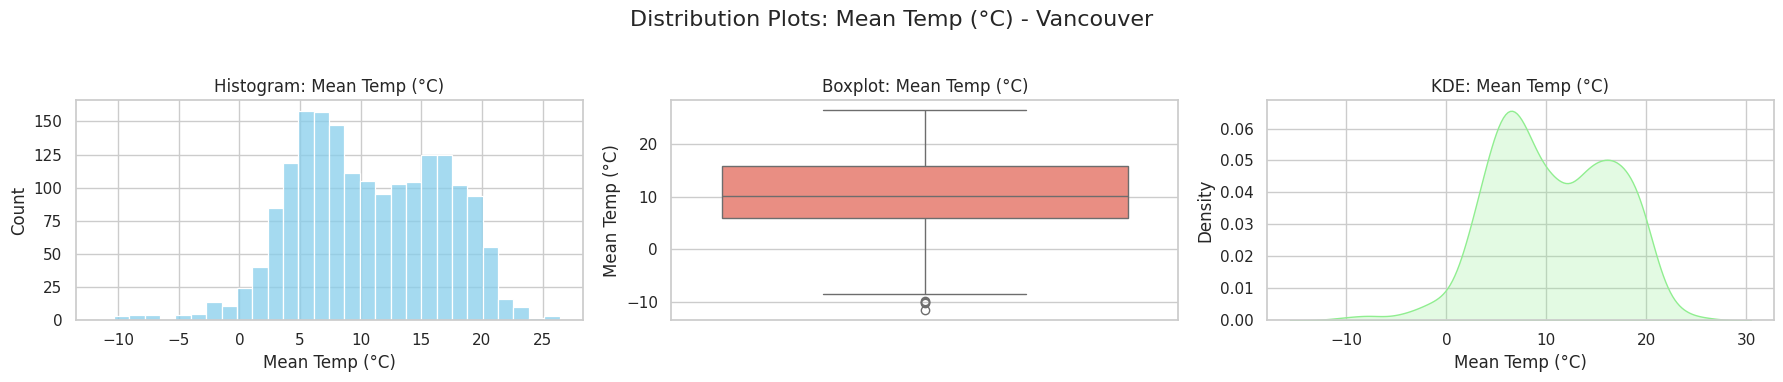

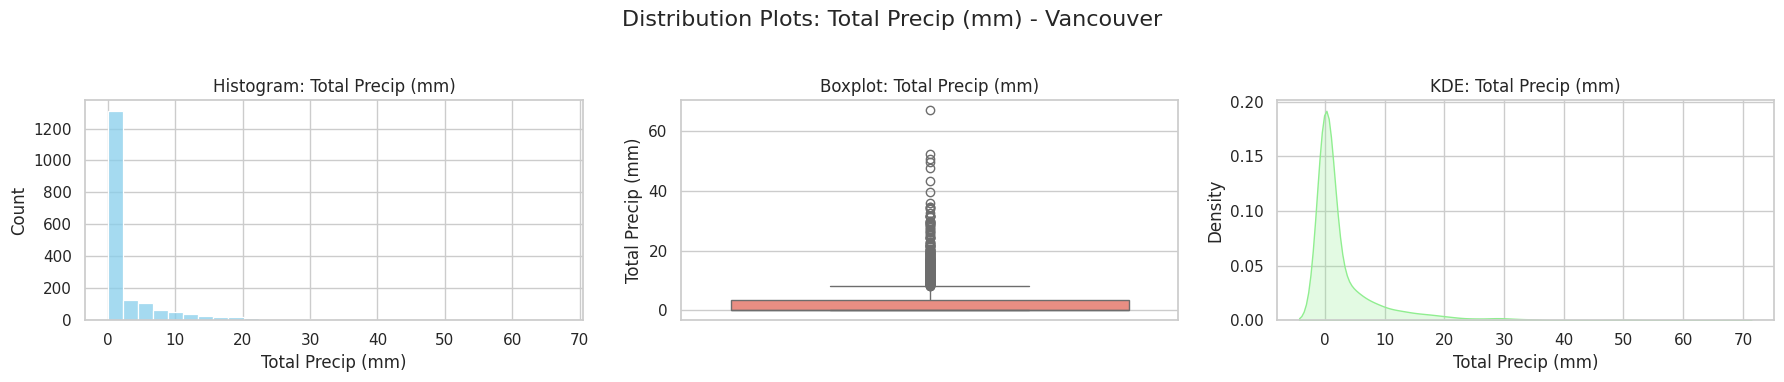

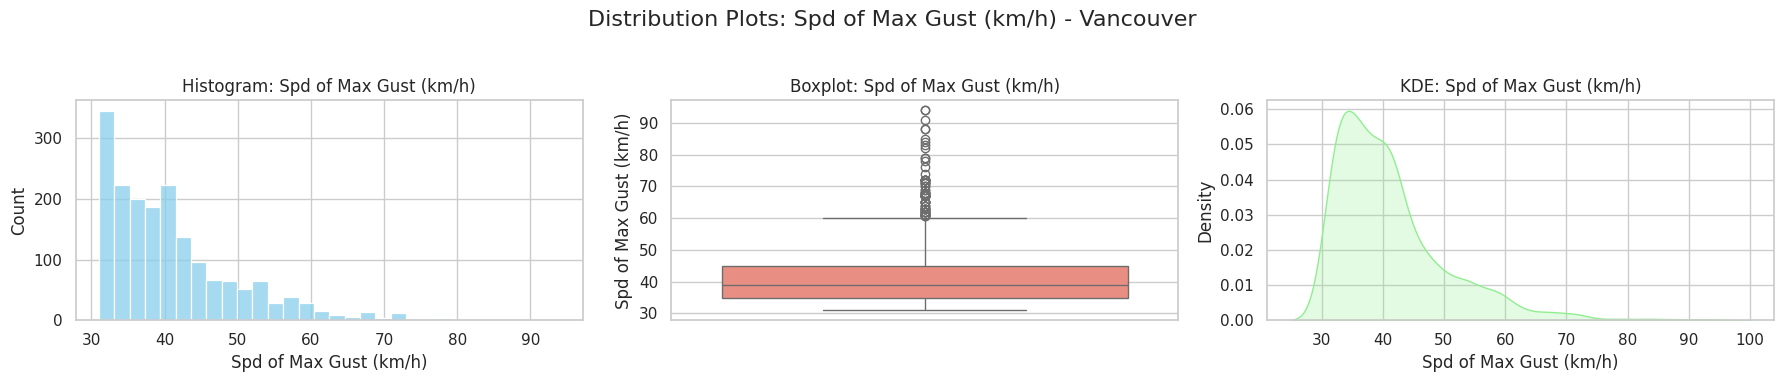

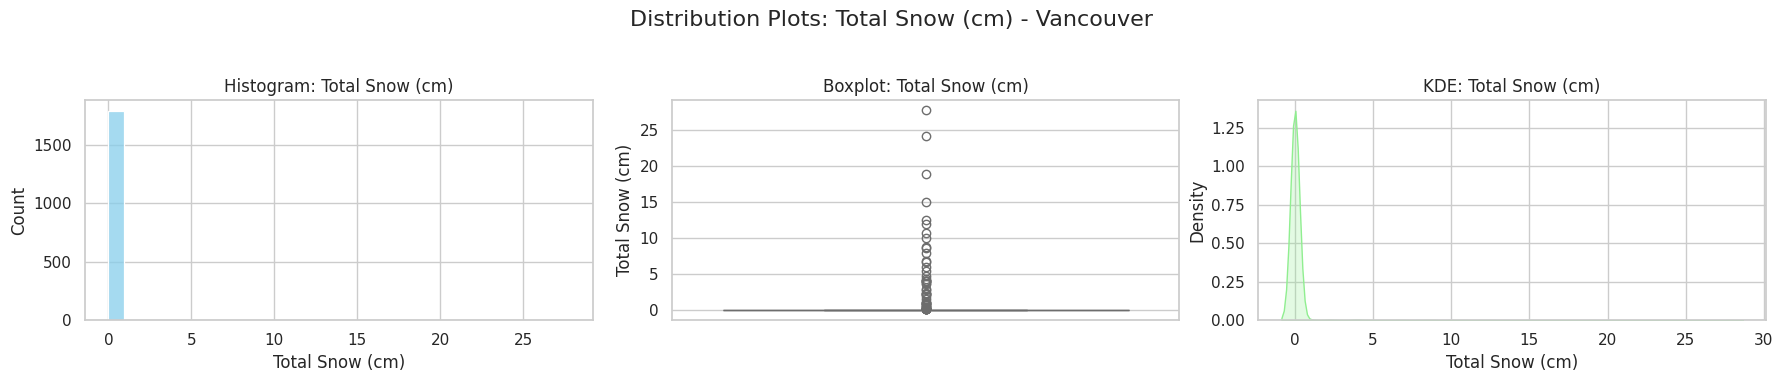

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Vancouver)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Vancouver", fontsize=16)

    # Histogram
    sns.histplot(df_vancouver[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_vancouver[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_vancouver[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

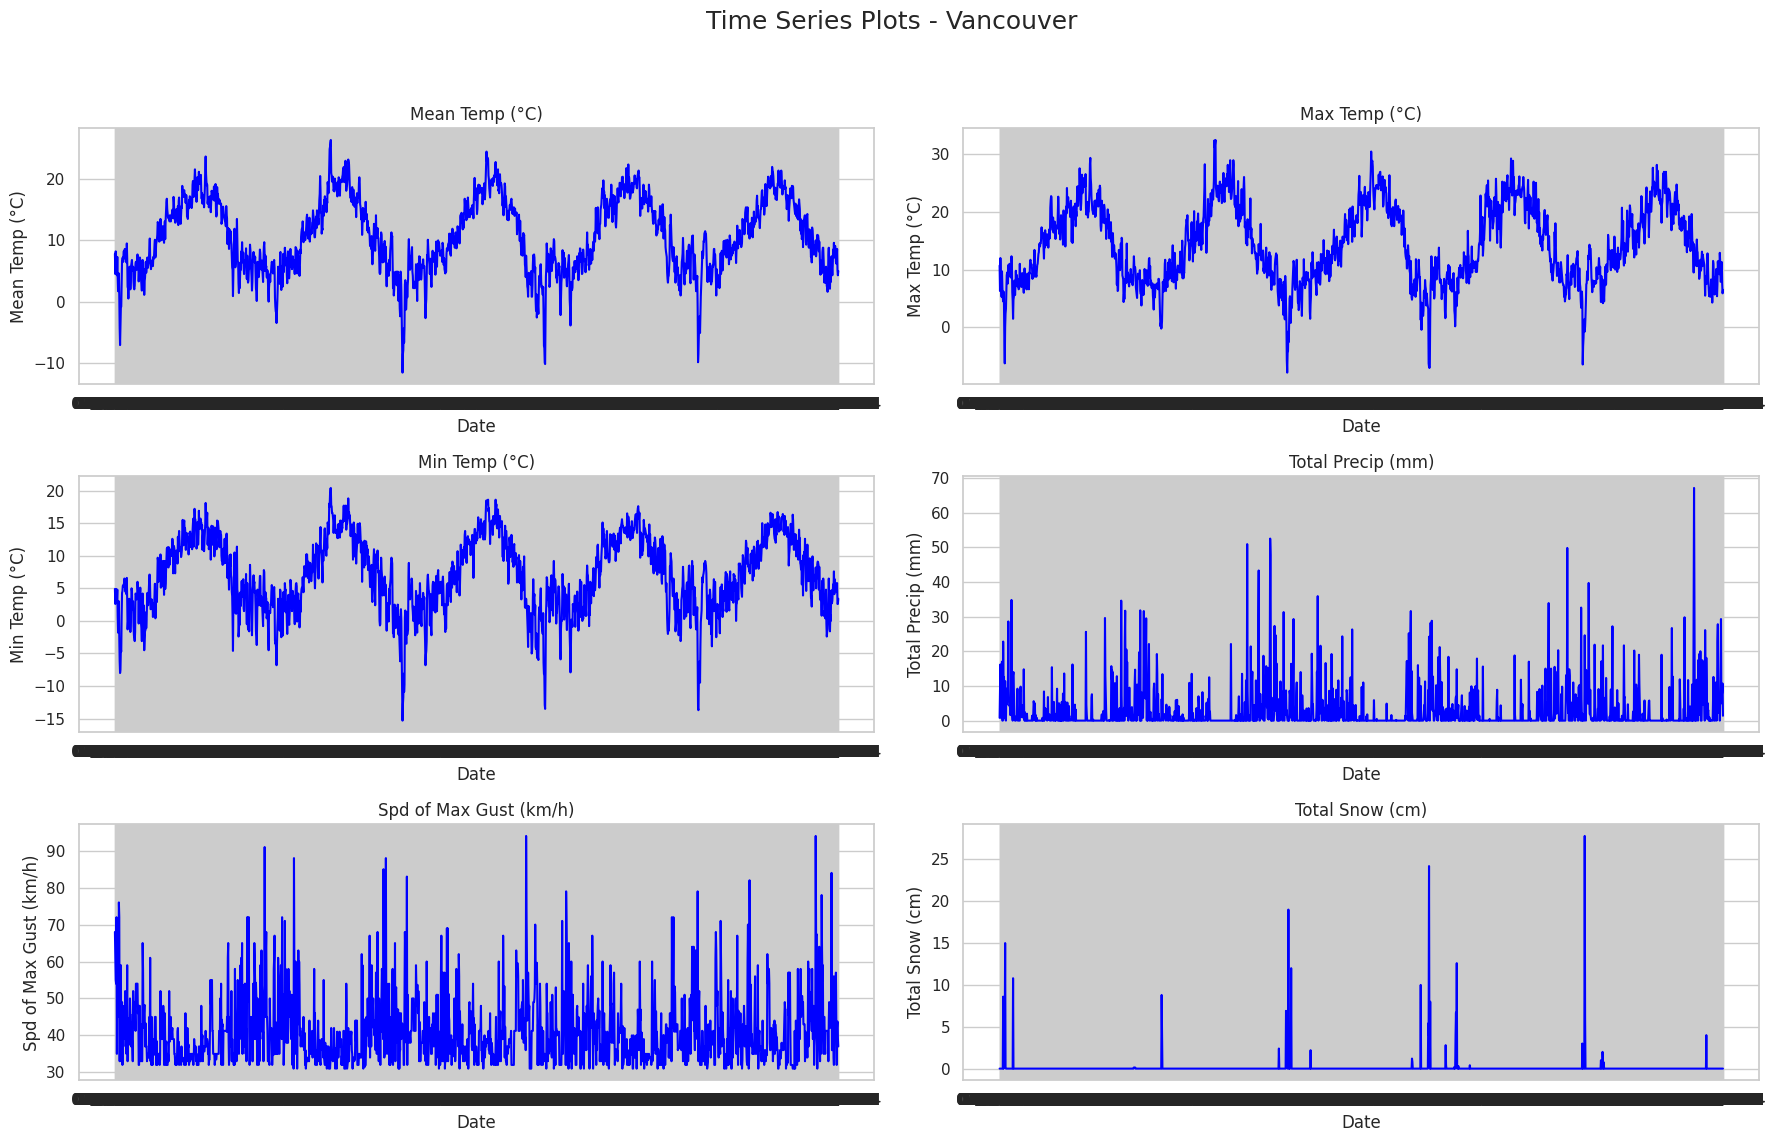

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Total Snow (cm)']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Vancouver", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_vancouver['Date'], df_vancouver[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Snow (cm)', 'Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_vancouver = df_vancouver.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_vancouver.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_vancouver.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_vancouver = monthly_agg_vancouver.reset_index()

# Round numeric columns for readability
monthly_agg_vancouver[monthly_agg_vancouver.columns[2:]] = monthly_agg_vancouver.iloc[:, 2:].round(2)

monthly_agg_vancouver

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020      1               7.05               2.17                4.64   
1   2020      2               7.55               1.81                4.70   
2   2020      3               9.04               1.85                5.48   
3   2020      4              13.73               4.86                9.31   
4   2020      5              17.81               9.53               13.69   
5   2020      6              19.15              11.90               15.55   
6   2020      7              21.65              13.35               17.52   
7   2020      8              22.16              13.63               17.92   
8   2020      9              20.19              12.46               16.36   
9   2020     10              13.36               7.61               10.50   
10  2020     11               9.23               3.71                6.50   
11  2020     12               7.83               2.52                5.20   
12  2021      1               7.82               2.67                5.27   
13  2021      2               6.08               0.71                3.41   
14  2021      3               9.98               2.52                6.27   
15  2021      4              13.74               4.96                9.37   
16  2021      5              16.26               8.56               12.43   
17  2021      6              22.27              13.08               17.70   
18  2021      7              24.03              14.61               19.35   
19  2021      8              23.05              14.61               18.86   
20  2021      9              18.59              11.52               15.08   
21  2021     10              12.51               6.78                9.66   
22  2021     11              10.12               4.75                7.47   
23  2021     12               3.97              -2.28                0.86   
24  2022      1               6.45               1.63                4.06   
25  2022      2               7.50               1.18                4.36   
26  2022      3              10.25               4.19                7.25   
27  2022      4              11.78               4.11                7.98   
28  2022      5              14.76               8.08               11.44   
29  2022      6              19.31              11.85               15.61   
30  2022      7              22.88              14.85               18.89   
31  2022      8              24.08              15.41               19.76   
32  2022      9              20.54              11.57               16.09   
33  2022     10              16.25               7.95               12.13   
34  2022     11               7.48               0.33                3.93   
35  2022     12               4.14              -1.34                1.41   
36  2023      1               7.85               2.88                5.39   
37  2023      2               6.81               1.48                4.17   
38  2023      3               9.88               2.10                6.01   
39  2023      4              11.98               4.93                8.48   
40  2023      5              19.35              10.40               14.90   
41  2023      6              20.51              11.79               16.17   
42  2023      7              23.86              14.09               18.99   
43  2023      8              22.63              14.20               18.44   
44  2023      9              19.35              11.15               15.28   
45  2023     10              14.24               7.11               10.70   
46  2023     11               9.57               2.79                6.20   
47  2023     12               9.31               4.64                7.00   
48  2024      1               6.13               0.83                3.50   
49  2024      2               8.65               2.37                5.54   
50  2024      3              10.02               3.29                6.69   


In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Snow (cm)', 'Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_vancouver = df_vancouver.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_vancouver.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_vancouver.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_vancouver = yearly_agg_vancouver.reset_index()

# Round numeric columns for readability
yearly_agg_vancouver[yearly_agg_vancouver.columns[1:]] = yearly_agg_vancouver.iloc[:, 1:].round(2)

yearly_agg_vancouver

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020              14.08               7.13               10.63   
1  2021              14.08               6.91               10.52   
2  2022              13.83               6.69               10.28   
3  2023              14.67               7.34               11.03   
4  2024              14.13               7.29               10.74   

   Avg Spd of Max Gust (km/h)  Total Total Snow (cm)  Total Total Precip (mm)  
0                       40.83                  45.93                  1140.40  
1                       41.60                  48.30                  1156.55  
2                       41.46                  73.00                  1048.22  
3                       40.28                  29.70                   882.78  
4                       41.94                  45.55                  1373.62

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.90            0.98   
Min Temp (°C)                    0.90           1.00            0.97   
Mean Temp (°C)                   0.98           0.97            1.00   
Total Snow (cm)                 -0.21          -0.22           -0.22   
Total Precip (mm)               -0.23          -0.06           -0.16   
Spd of Max Gust (km/h)          -0.25          -0.22           -0.25   

                        Total Snow (cm)  Total Precip (mm)  \
Max Temp (°C)                     -0.21              -0.23   
Min Temp (°C)                     -0.22              -0.06   
Mean Temp (°C)                    -0.22              -0.16   
Total Snow (cm)                    1.00               0.15   
Total Precip (mm)                  0.15               1.00   
Spd of Max Gust (km/h)             0.01               0.18   

                        Spd of Max Gust (km/h)  
Max Temp (°

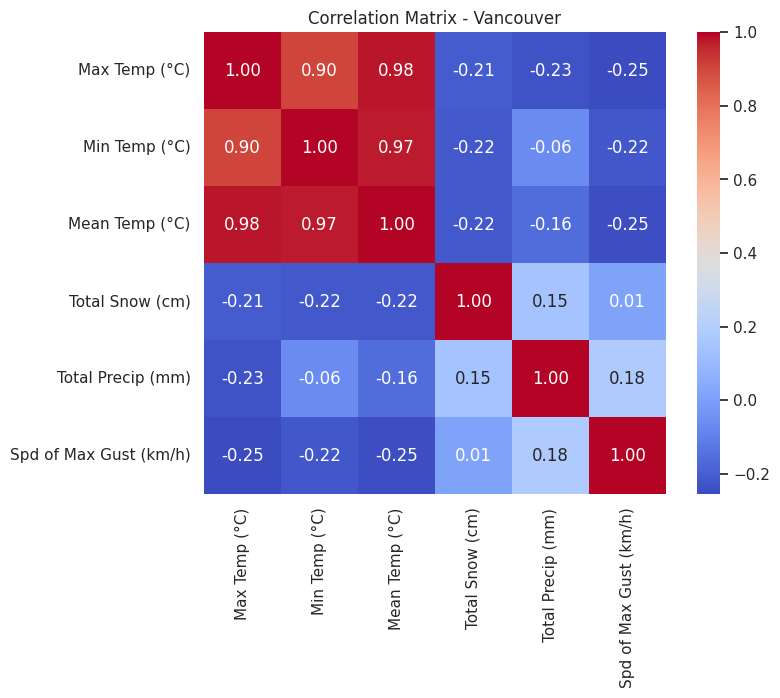

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Snow (cm)', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_vancouver[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Vancouver")
plt.show()

---

---

**COTONOU**

In [ ]:
# SUMMARY STATISTICS

# Columns for Cotonou
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

df_city = df_cotonou[num_cols]

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_cotonou = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_cotonou = summary_cotonou[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_cotonou.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_cotonou['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_cotonou = summary_cotonou.round(2)

summary_cotonou

count   mean    Q1  median    Q3   min    max   std  \
Max Temp (°C)           1827.0  30.99  29.5    31.3  32.3  25.3   36.0  1.83   
Min Temp (°C)           1827.0  25.13  24.9    25.2  25.6  19.6   30.0  1.25   
Mean Temp (°C)          1827.0  27.99  26.8    28.2  29.1  24.4   31.3  1.45   
Total Precip (mm)       1827.0   2.41   0.0     0.0   0.3   0.0  168.1  8.88   
Spd of Max Gust (km/h)  1827.0   0.00   0.0     0.0   0.0   0.0    0.0  0.00   
Pressure                1827.0   0.00   0.0     0.0   0.0   0.0    0.0  0.00   

                         10%    90%  IQR  
Max Temp (°C)           28.4  33.20  2.8  
Min Temp (°C)           23.7  26.42  0.7  
Mean Temp (°C)          25.9  29.80  2.3  
Total Precip (mm)        0.0   6.10  0.3  
Spd of Max Gust (km/h)   0.0   0.00  0.0  
Pressure                 0.0   0.00  0.0

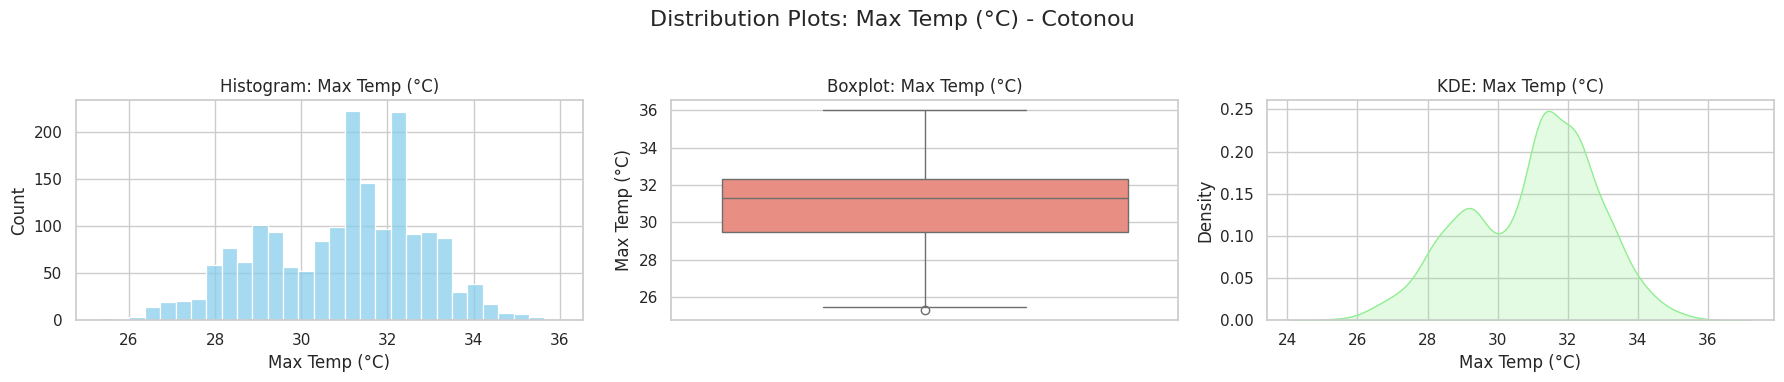

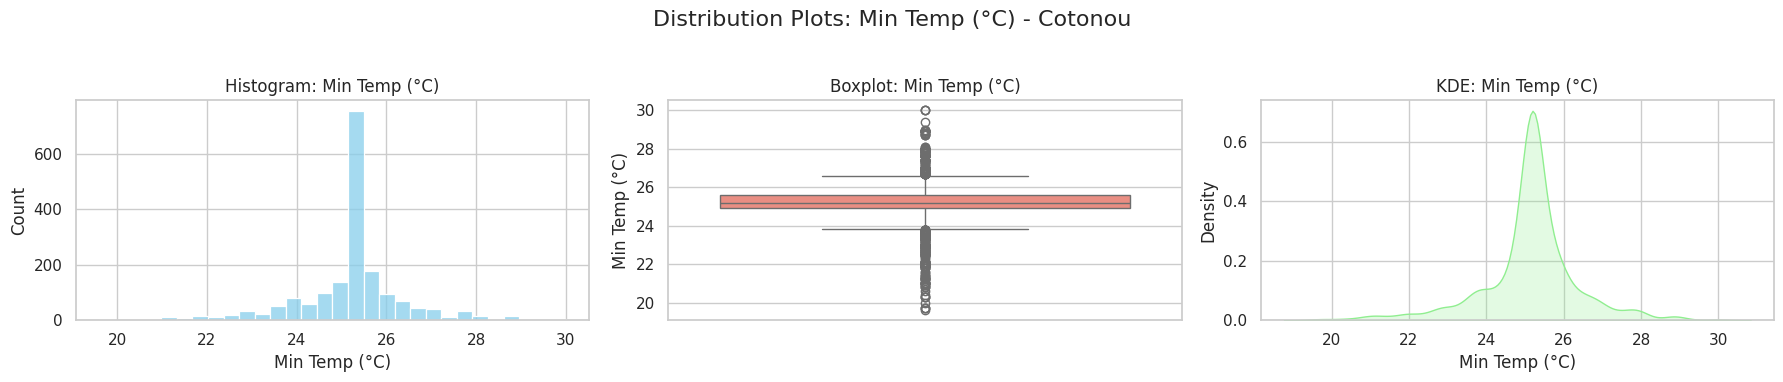

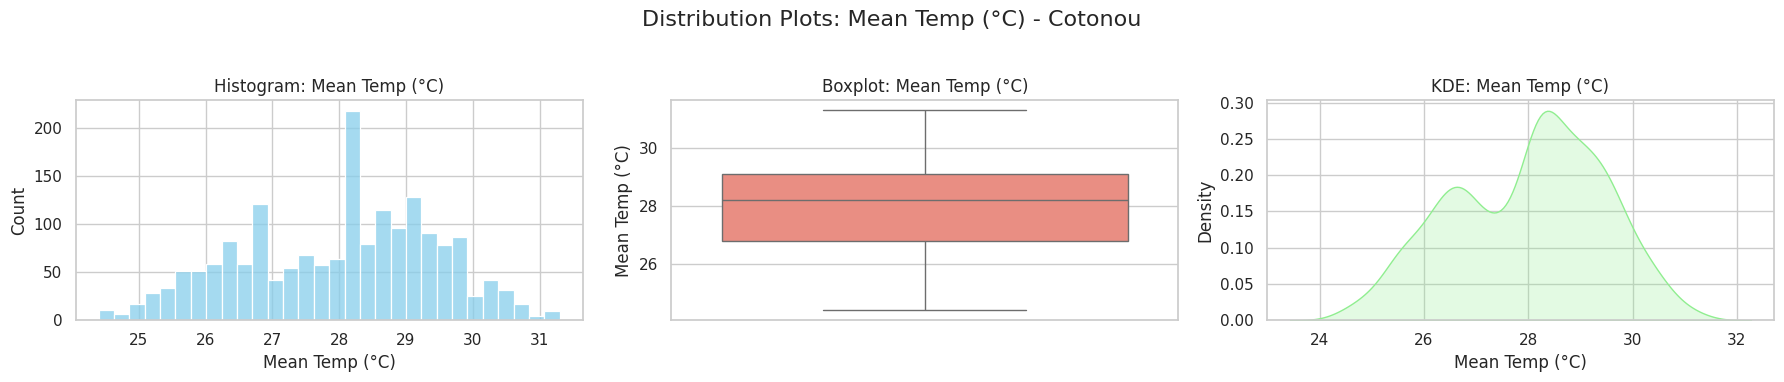

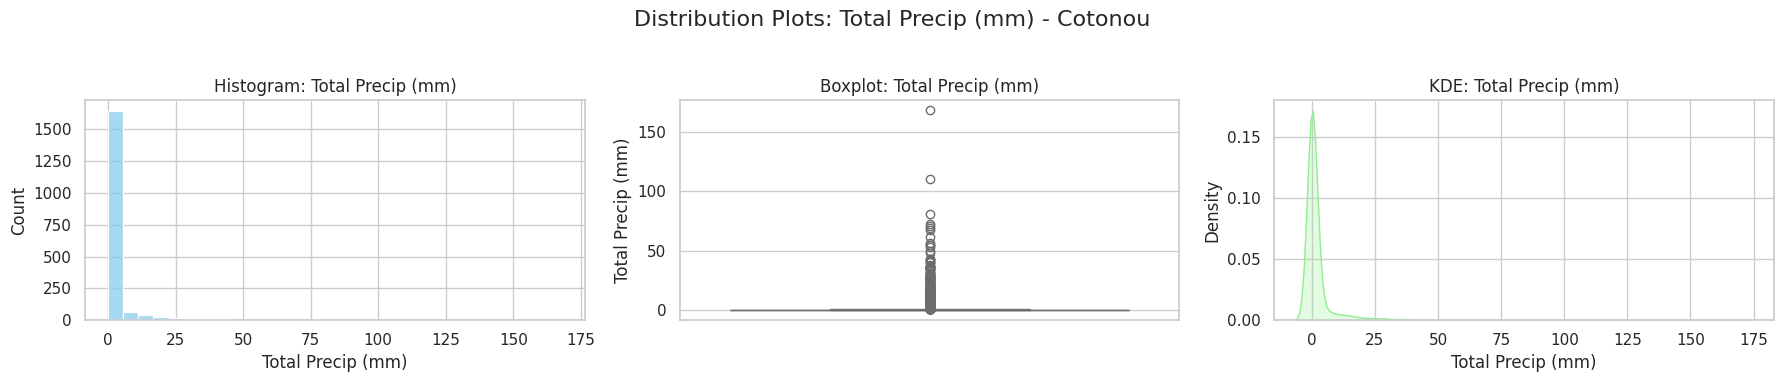

/tmp/ipython-input-3254641157.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_cotonou[col], ax=axes[2], fill=True, color='lightgreen')


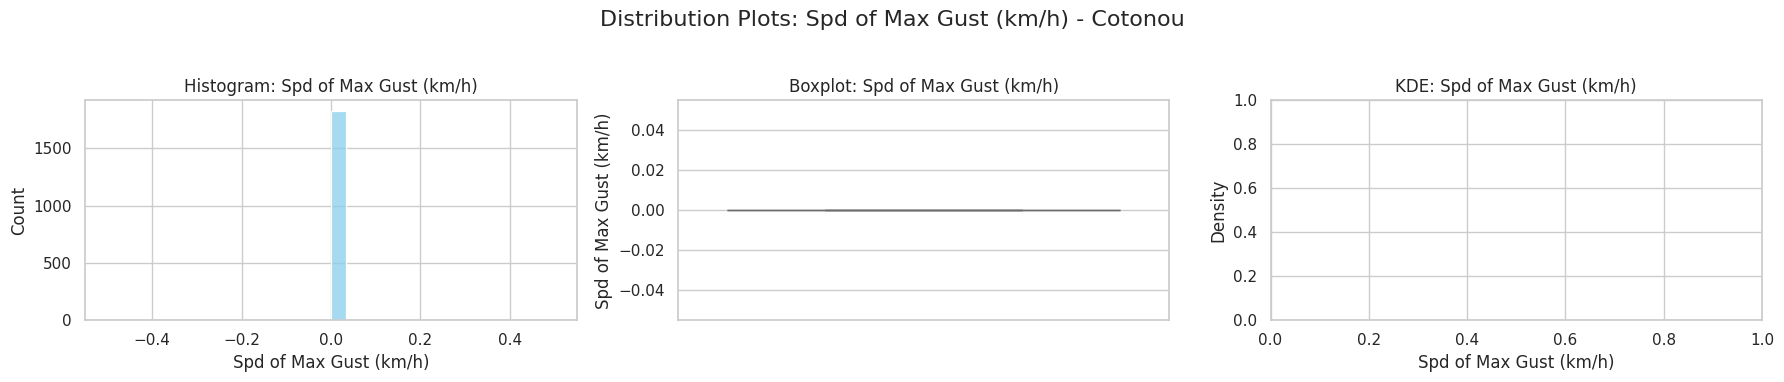

/tmp/ipython-input-3254641157.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_cotonou[col], ax=axes[2], fill=True, color='lightgreen')


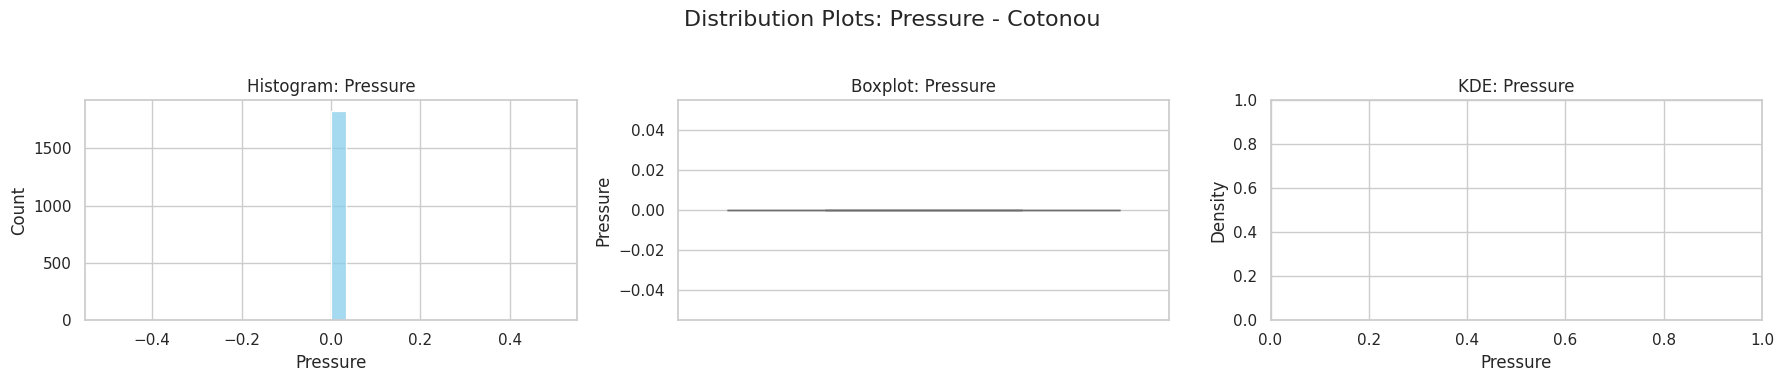

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Cotonou)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Cotonou", fontsize=16)

    # Histogram
    sns.histplot(df_cotonou[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_cotonou[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_cotonou[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

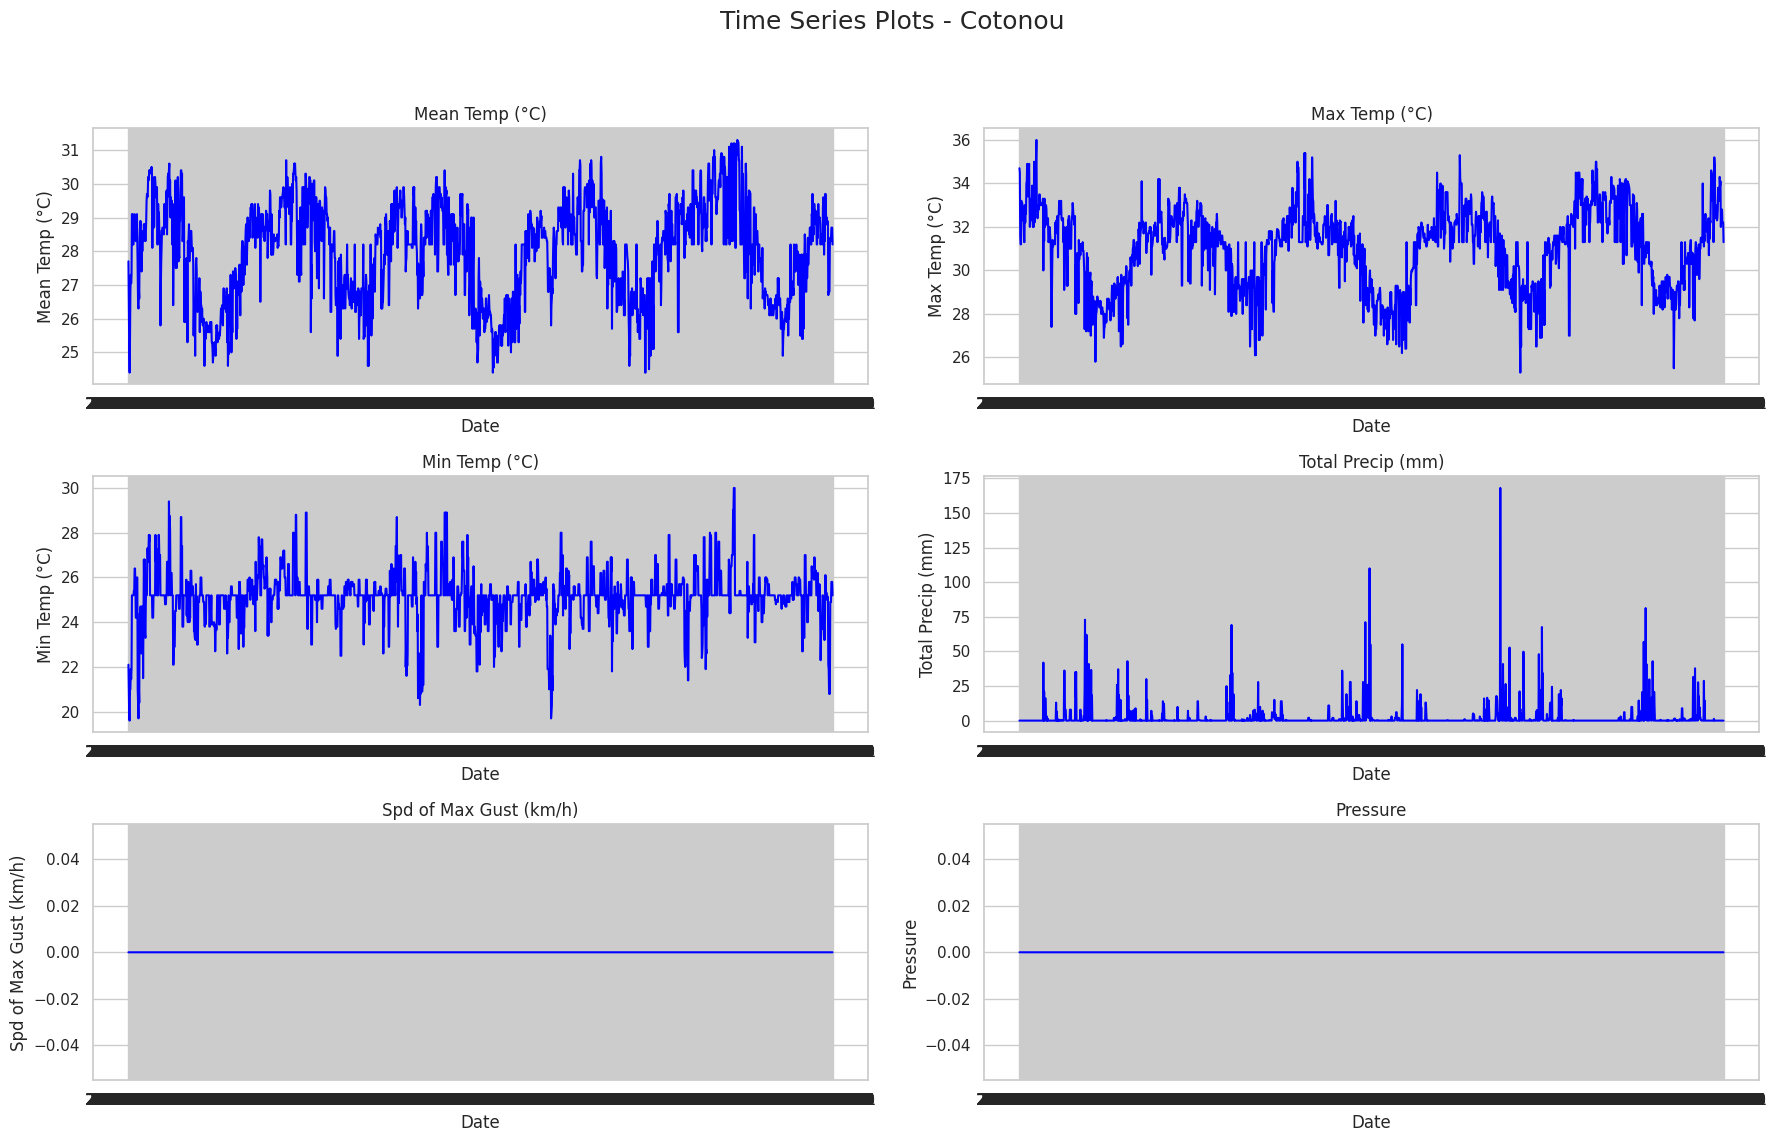

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Cotonou", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_cotonou['Date'], df_cotonou[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_cotonou = df_cotonou.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_cotonou.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_cotonou.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_cotonou = monthly_agg_cotonou.reset_index()

# Round numeric columns for readability
monthly_agg_cotonou[monthly_agg_cotonou.columns[2:]] = monthly_agg_cotonou.iloc[:, 2:].round(2)

monthly_agg_cotonou

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020.0    1.0              32.97              23.25               27.71   
1   2020.0    2.0              33.15              25.29               29.19   
2   2020.0    3.0              31.57              25.70               28.92   
3   2020.0    4.0              32.03              25.42               29.10   
4   2020.0    5.0              31.28              25.26               28.56   
5   2020.0    6.0              30.08              24.69               27.36   
6   2020.0    7.0              28.34              24.91               25.89   
7   2020.0    8.0              28.23              24.38               25.52   
8   2020.0    9.0              28.81              24.80               26.28   
9   2020.0   10.0              30.10              24.73               27.29   
10  2020.0   11.0              31.68              25.42               28.77   
11  2020.0   12.0              31.89              26.02               28.70   
12  2021.0    1.0              31.72              25.44               28.60   
13  2021.0    2.0              32.25              25.91               29.44   
14  2021.0    3.0              31.90              26.06               29.16   
15  2021.0    4.0              32.10              25.28               29.32   
16  2021.0    5.0              31.24              25.12               28.85   
17  2021.0    6.0              30.83              25.00               27.54   
18  2021.0    7.0              29.27              25.01               26.92   
19  2021.0    8.0              29.03              25.37               26.63   
20  2021.0    9.0              28.96              24.95               26.56   
21  2021.0   10.0              30.82              25.18               28.02   
22  2021.0   11.0              31.79              25.70               28.64   
23  2021.0   12.0              32.65              25.04               28.89   
24  2022.0    1.0              32.62              24.06               28.13   
25  2022.0    2.0              31.66              25.11               28.51   
26  2022.0    3.0              31.98              25.74               29.18   
27  2022.0    4.0              31.22              25.74               28.41   
28  2022.0    5.0              31.26              25.46               28.40   
29  2022.0    6.0              29.53              24.19               26.65   
30  2022.0    7.0              28.40              24.79               26.22   
31  2022.0    8.0              27.85              24.25               25.33   
32  2022.0    9.0              28.12              24.87               26.06   
33  2022.0   10.0              29.85              24.88               27.33   
34  2022.0   11.0              31.63              25.49               28.46   
35  2022.0   12.0              32.16              24.45               28.20   
36  2023.0    1.0              32.30              24.60               28.26   
37  2023.0    2.0              32.54              25.18               29.09   
38  2023.0    3.0              32.28              24.95               28.90   
39  2023.0    4.0              32.28              25.62               29.49   
40  2023.0    5.0              31.79              25.39               28.76   
41  2023.0    6.0              30.08              24.81               27.34   
42  2023.0    7.0              29.19              24.99               26.85   
43  2023.0    8.0              28.81              25.23               26.48   
44  2023.0    9.0              28.98              24.98               26.43   
45  2023.0   10.0              30.95              25.35               28.18   
46  2023.0   11.0              31.20              25.59               28.50   
47  2023.0   12.0              33.16              24.61               28.95   
48  2024.0    1.0              32.89              25.34               29.29   
49  2024.0    2.0              33.30              25.53 

In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_cotonou = df_cotonou.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_cotonou.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_cotonou.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_cotonou = yearly_agg_cotonou.reset_index()

# Round numeric columns for readability
yearly_agg_cotonou[yearly_agg_cotonou.columns[1:]] = yearly_agg_cotonou.iloc[:, 1:].round(2)

yearly_agg_cotonou

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020.0              30.83              24.99               27.77   
1  2021.0              31.04              25.33               28.21   
2  2022.0              30.52              24.92               27.57   
3  2023.0              31.13              25.11               28.10   
4  2024.0              31.45              25.31               28.33   

   Avg Spd of Max Gust (km/h)  Avg Pressure  Total Total Precip (mm)  
0                         0.0           0.0                  1005.20  
1                         0.0           0.0                   580.75  
2                         0.0           0.0                   927.35  
3                         0.0           0.0                  1061.60  
4                         0.0           0.0                   836.80

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.12            0.85   
Min Temp (°C)                    0.12           1.00            0.43   
Mean Temp (°C)                   0.85           0.43            1.00   
Pressure                          NaN            NaN             NaN   
Total Precip (mm)               -0.16          -0.18           -0.17   
Spd of Max Gust (km/h)            NaN            NaN             NaN   

                        Pressure  Total Precip (mm)  Spd of Max Gust (km/h)  
Max Temp (°C)                NaN              -0.16                     NaN  
Min Temp (°C)                NaN              -0.18                     NaN  
Mean Temp (°C)               NaN              -0.17                     NaN  
Pressure                     NaN                NaN                     NaN  
Total Precip (mm)            NaN               1.00                     NaN  
Spd of Max Gust (km/h)     

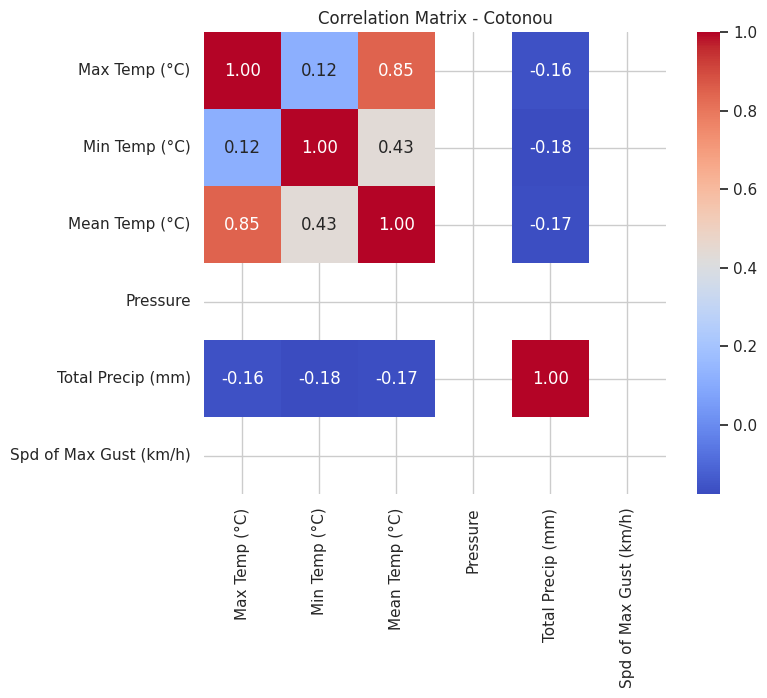

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Pressure', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_cotonou[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Cotonou")
plt.show()

---

---

**PARAKOU**

In [ ]:
# SUMMARY STATISTICS

# Columns for Parakou
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

df_city = df_parakou[num_cols]

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_parakou = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_parakou = summary_parakou[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_parakou.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_parakou['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_parakou = summary_parakou.round(2)

summary_parakou

count   mean    Q1  median    Q3   min    max    std  \
Max Temp (°C)           1827.0  33.59  31.0    34.0  35.9  24.1   41.0   3.21   
Min Temp (°C)           1827.0  22.16  21.2    22.1  23.0  13.6   26.7   1.56   
Mean Temp (°C)          1827.0  27.34  25.7    27.4  28.7  20.3   34.7   2.09   
Total Precip (mm)       1827.0   3.55   0.0     0.5   3.0   0.0  148.1  10.17   
Spd of Max Gust (km/h)  1827.0   0.00   0.0     0.0   0.0   0.0    0.0   0.00   
Pressure                1827.0   0.00   0.0     0.0   0.0   0.0    0.0   0.00   

                         10%    90%  IQR  
Max Temp (°C)           29.1  37.60  4.9  
Min Temp (°C)           20.1  24.20  1.8  
Mean Temp (°C)          24.6  30.14  3.0  
Total Precip (mm)        0.0   7.42  3.0  
Spd of Max Gust (km/h)   0.0   0.00  0.0  
Pressure                 0.0   0.00  0.0

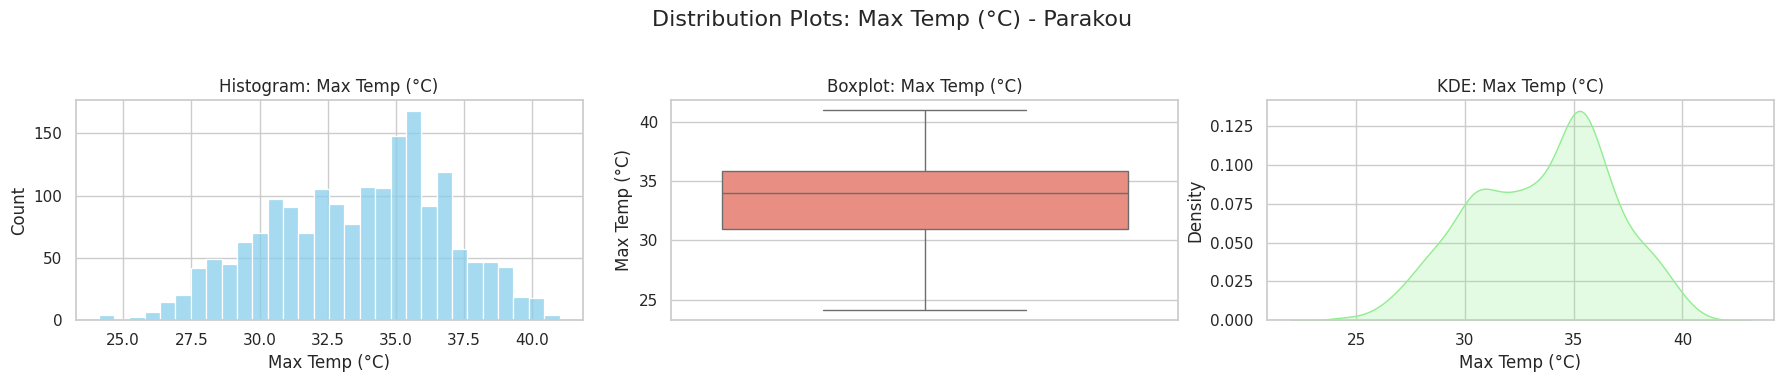

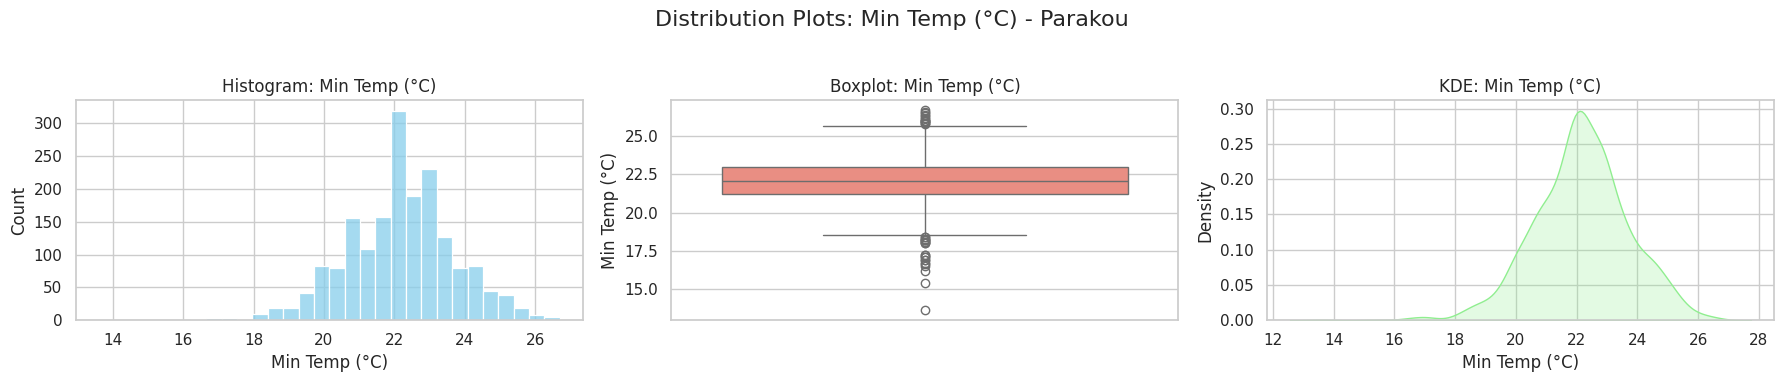

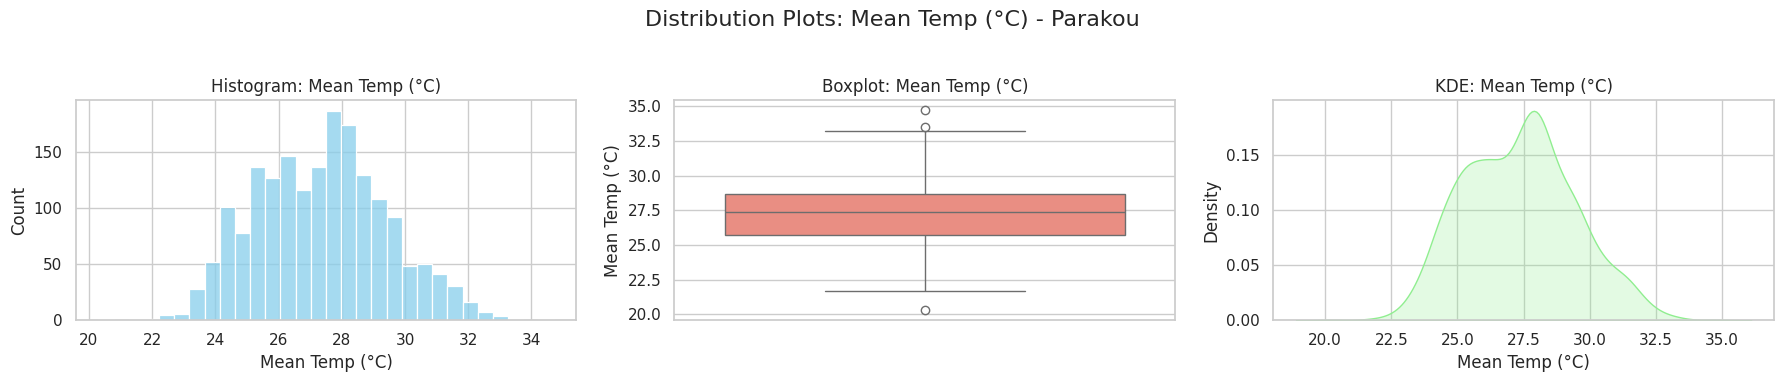

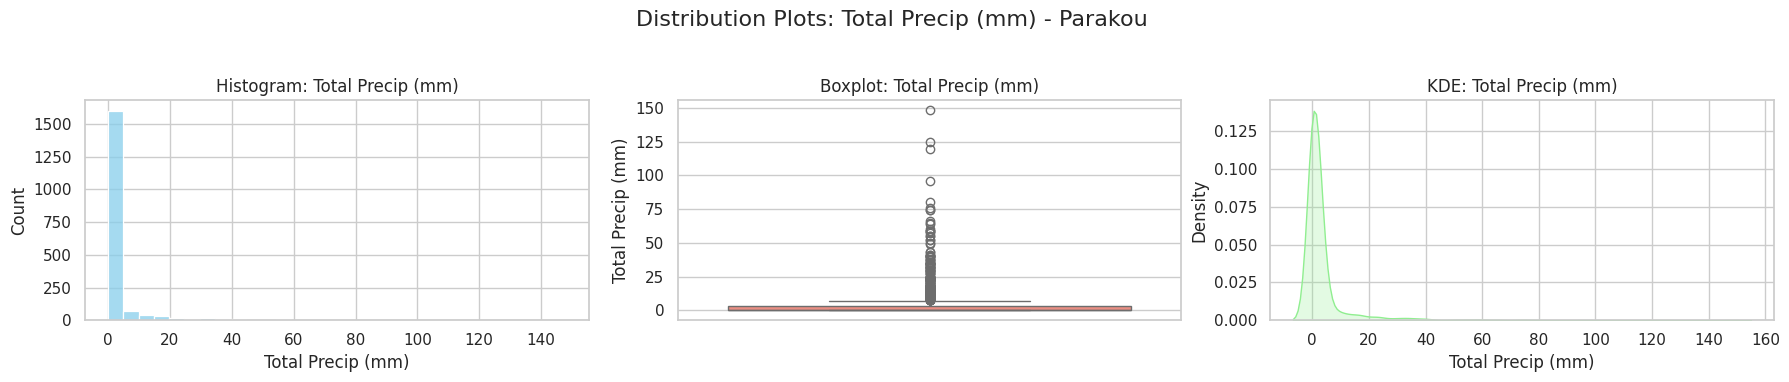

/tmp/ipython-input-885308468.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_parakou[col], ax=axes[2], fill=True, color='lightgreen')


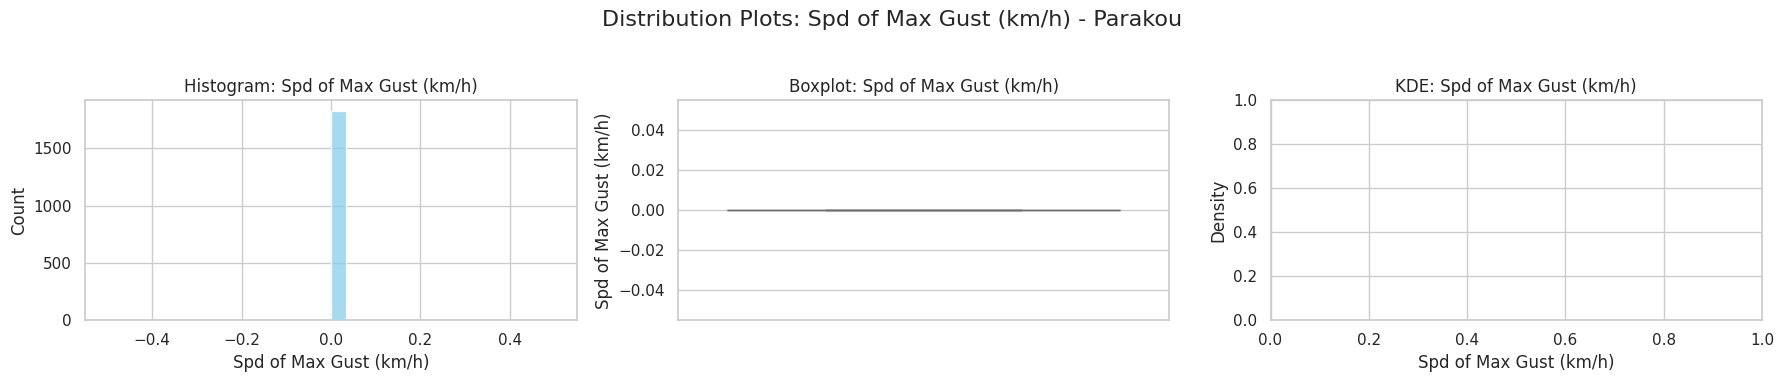

/tmp/ipython-input-885308468.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_parakou[col], ax=axes[2], fill=True, color='lightgreen')


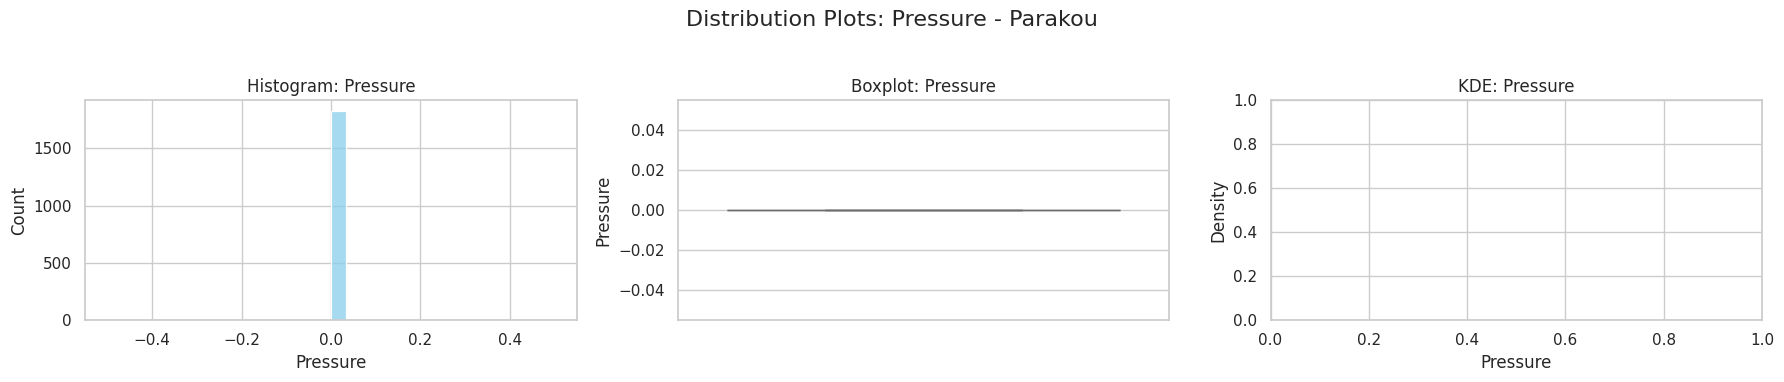

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Parakou)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Parakou", fontsize=16)

    # Histogram
    sns.histplot(df_parakou[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_parakou[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_parakou[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

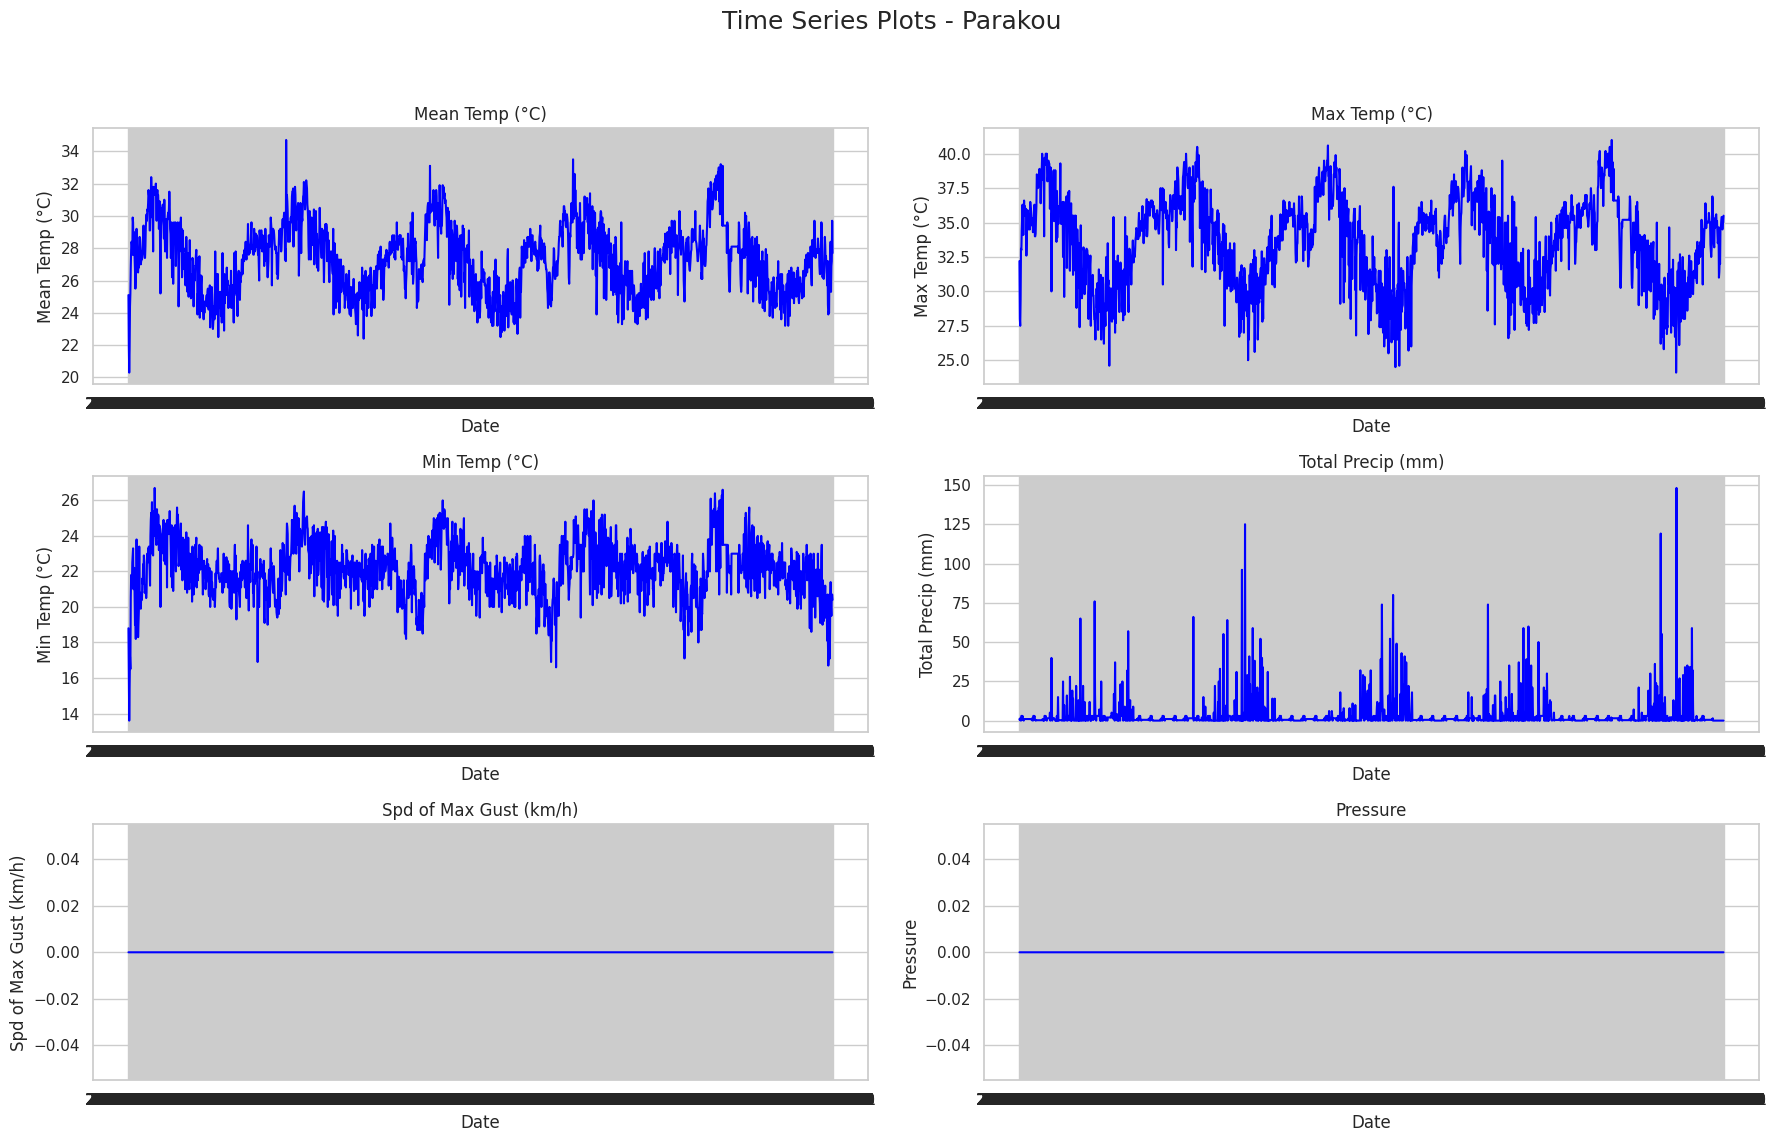

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Parakou", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_parakou['Date'], df_parakou[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_parakou = df_parakou.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_parakou.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_parakou.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_parakou = monthly_agg_parakou.reset_index()

# Round numeric columns for readability
monthly_agg_parakou[monthly_agg_parakou.columns[2:]] = monthly_agg_parakou.iloc[:, 2:].round(2)

monthly_agg_parakou

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020      1              34.44              20.10               26.90   
1   2020      2              36.66              21.99               29.19   
2   2020      3              37.82              24.15               30.37   
3   2020      4              35.58              23.60               29.05   
4   2020      5              34.30              23.34               28.05   
5   2020      6              31.54              22.15               26.22   
6   2020      7              29.44              22.05               24.97   
7   2020      8              29.33              21.51               24.78   
8   2020      9              30.36              21.59               25.24   
9   2020     10              32.29              21.64               26.41   
10  2020     11              34.87              21.98               28.22   
11  2020     12              35.66              21.00               27.97   
12  2021      1              35.77              21.04               28.21   
13  2021      2              36.77              22.80               29.66   
14  2021      3              37.45              24.28               30.17   
15  2021      4              37.01              23.59               29.67   
16  2021      5              34.64              23.12               28.41   
17  2021      6              32.40              21.95               26.76   
18  2021      7              30.36              21.97               25.40   
19  2021      8              29.69              21.94               24.85   
20  2021      9              30.29              21.68               25.33   
21  2021     10              32.77              22.33               26.77   
22  2021     11              34.92              22.45               27.98   
23  2021     12              34.93              20.56               27.51   
24  2022      1              34.29              20.56               26.89   
25  2022      2              37.02              22.20               29.34   
26  2022      3              38.14              24.38               30.47   
27  2022      4              35.79              23.36               28.62   
28  2022      5              33.29              23.01               27.54   
29  2022      6              31.39              21.57               25.69   
30  2022      7              29.98              22.00               25.23   
31  2022      8              29.37              21.37               24.50   
32  2022      9              29.24              21.48               24.72   
33  2022     10              32.01              22.07               26.49   
34  2022     11              35.17              21.53               28.04   
35  2022     12              34.22              20.44               27.00   
36  2023      1              35.12              20.63               27.34   
37  2023      2              36.72              22.57               29.44   
38  2023      3              37.46              23.51               29.56   
39  2023      4              36.06              23.56               29.10   
40  2023      5              34.08              23.33               28.21   
41  2023      6              32.01              22.53               26.41   
42  2023      7              31.38              22.18               25.85   
43  2023      8              29.28              22.06               24.77   
44  2023      9              30.88              21.88               25.64   
45  2023     10              32.93              22.72               27.15   
46  2023     11              35.07              22.35               28.35   
47  2023     12              35.19              20.19               27.62   
48  2024      1              35.80              20.79               28.20   
49  2024      2              37.47              23.11               30.01   
50  2024      3              38.35              24.19               31.11   


In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_parakou = df_parakou.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_parakou.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_parakou.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_parakou = yearly_agg_parakou.reset_index()

# Round numeric columns for readability
yearly_agg_parakou[yearly_agg_parakou.columns[1:]] = yearly_agg_parakou.iloc[:, 1:].round(2)

yearly_agg_parakou

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020              33.51              22.09               27.27   
1  2021              33.90              22.30               27.54   
2  2022              33.30              21.99               27.03   
3  2023              33.83              22.29               27.44   
4  2024              33.42              22.11               27.42   

   Avg Spd of Max Gust (km/h)  Avg Pressure  Total Total Precip (mm)  
0                         0.0           0.0                  1098.45  
1                         0.0           0.0                  1466.95  
2                         0.0           0.0                  1364.00  
3                         0.0           0.0                  1253.75  
4                         0.0           0.0                  1302.35

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.36            0.92   
Min Temp (°C)                    0.36           1.00            0.57   
Mean Temp (°C)                   0.92           0.57            1.00   
Pressure                          NaN            NaN             NaN   
Total Precip (mm)               -0.31          -0.17           -0.31   
Spd of Max Gust (km/h)            NaN            NaN             NaN   

                        Pressure  Total Precip (mm)  Spd of Max Gust (km/h)  
Max Temp (°C)                NaN              -0.31                     NaN  
Min Temp (°C)                NaN              -0.17                     NaN  
Mean Temp (°C)               NaN              -0.31                     NaN  
Pressure                     NaN                NaN                     NaN  
Total Precip (mm)            NaN               1.00                     NaN  
Spd of Max Gust (km/h)     

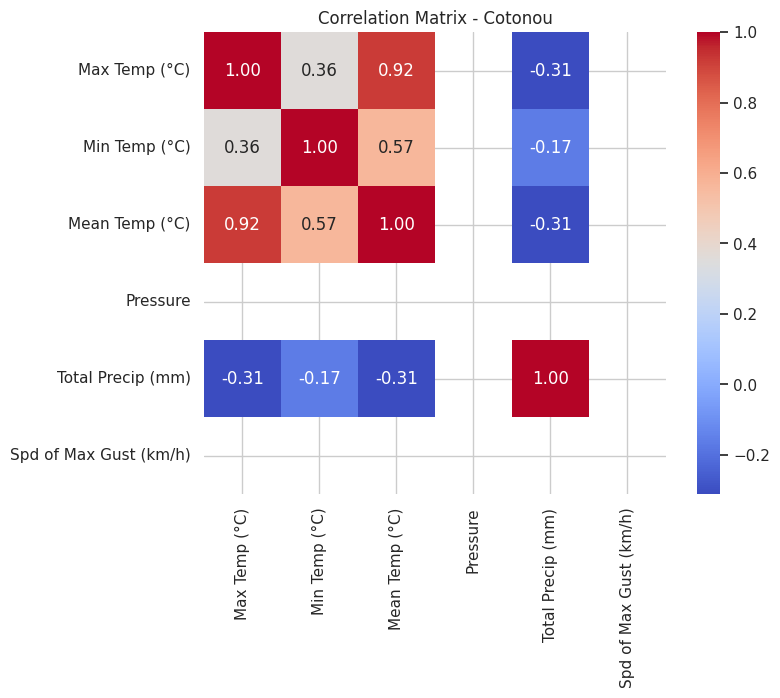

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Pressure', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_parakou[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Parakou")
plt.show()

---

---

**PLAISANCE**

In [ ]:
# SUMMARY STATISTICS

# Columns for Plaisance
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

df_city = df_plaisance[num_cols]

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_plaisance = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_plaisance = summary_plaisance[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_plaisance.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_plaisance['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_plaisance = summary_plaisance.round(2)

summary_plaisance

count     mean      Q1  median      Q3    min  \
Max Temp (°C)           1827.0    27.53    25.6    27.7    29.5   22.0   
Min Temp (°C)           1827.0    21.98    20.2    22.0    24.0   14.0   
Mean Temp (°C)          1827.0    24.58    22.8    24.6    26.4   19.5   
Total Precip (mm)       1827.0     3.36     0.5     1.0     2.0    0.0   
Spd of Max Gust (km/h)  1827.0    38.42    33.3    37.0    44.5   14.8   
Pressure                1827.0  1016.92  1013.9  1017.0  1020.2  996.0   

                           max    std     10%     90%   IQR  
Max Temp (°C)             34.0   2.23    24.6    30.2   3.9  
Min Temp (°C)             27.0   2.32    19.0    25.0   3.8  
Mean Temp (°C)            29.8   2.06    21.8    27.2   3.6  
Total Precip (mm)        204.0  10.13     0.0     6.9   1.5  
Spd of Max Gust (km/h)    90.8   8.91    27.8    50.0  11.2  
Pressure                1027.4   4.21  1011.5  1022.2   6.3

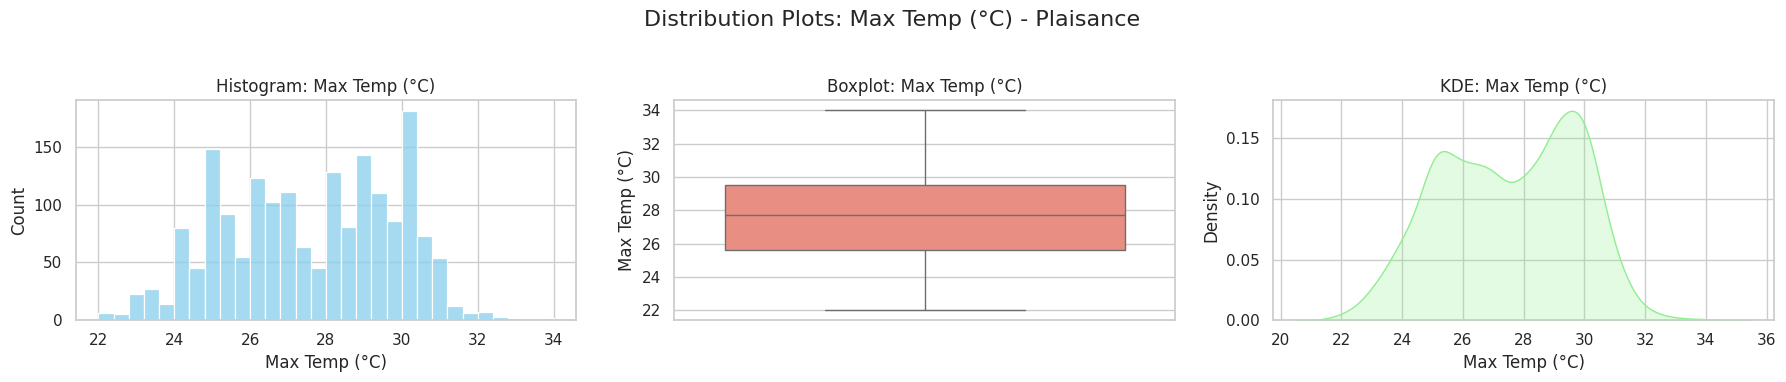

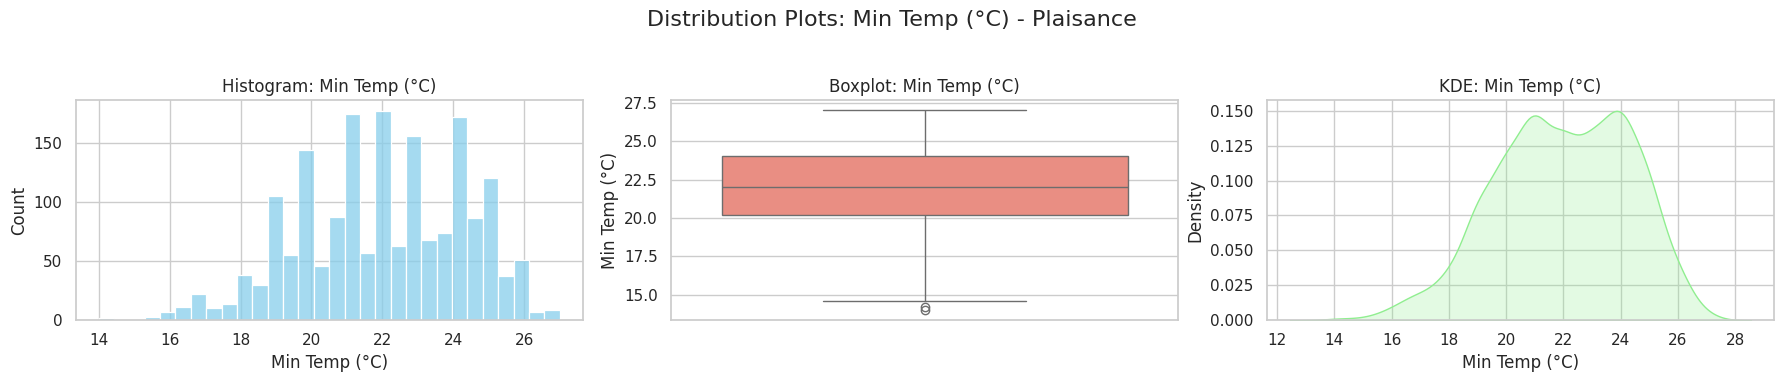

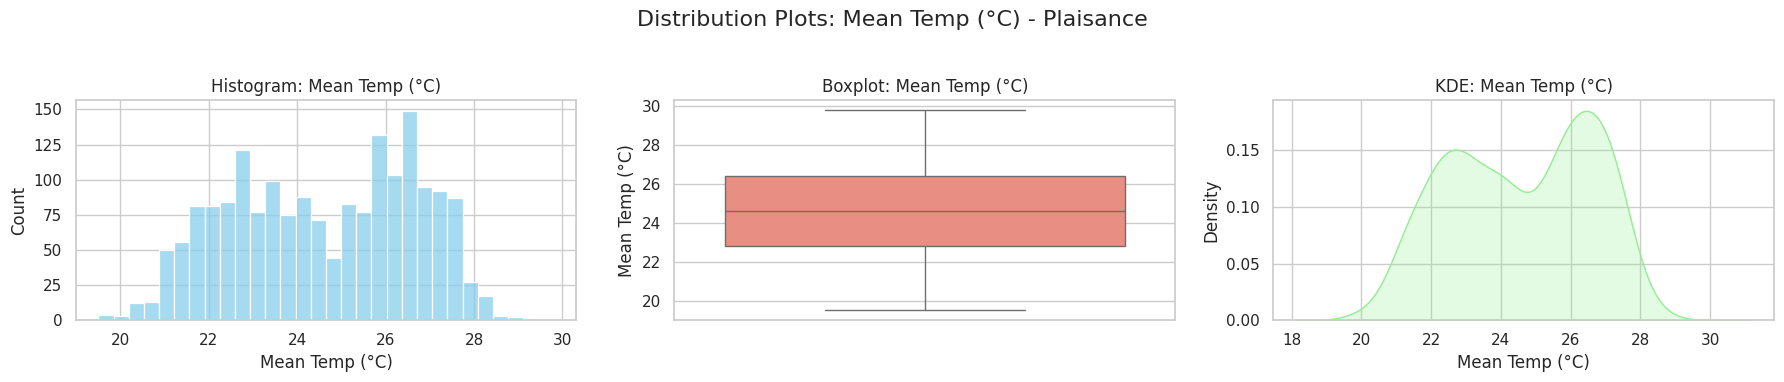

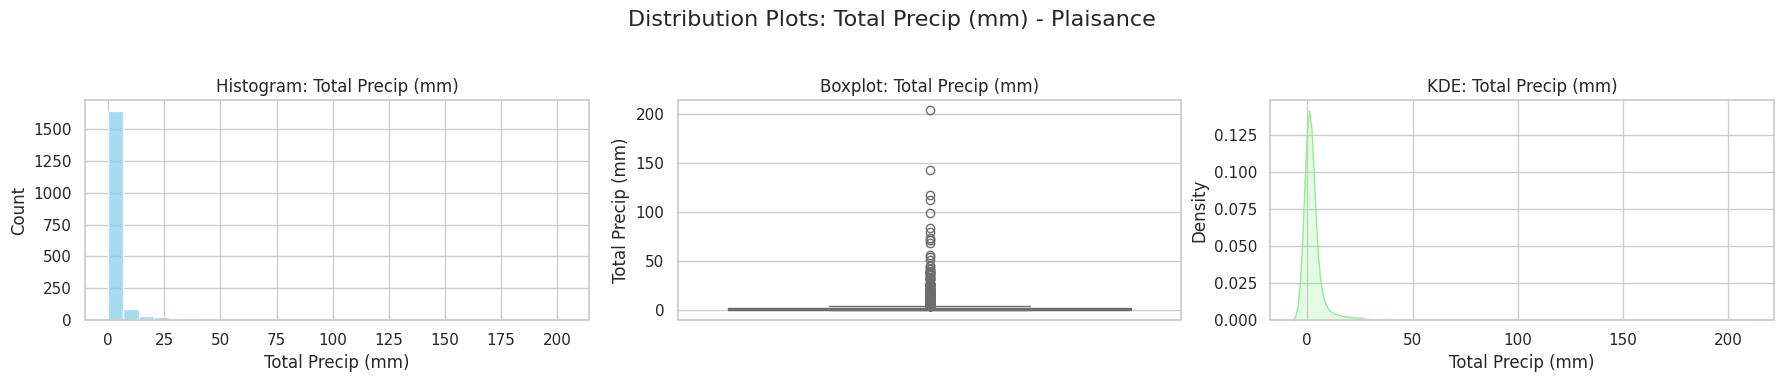

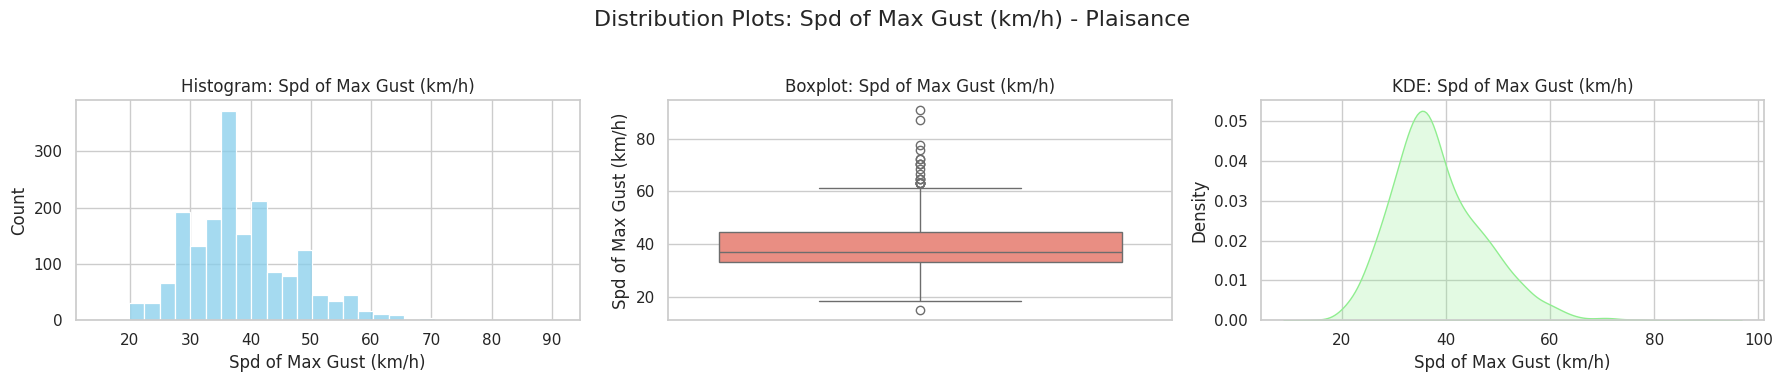

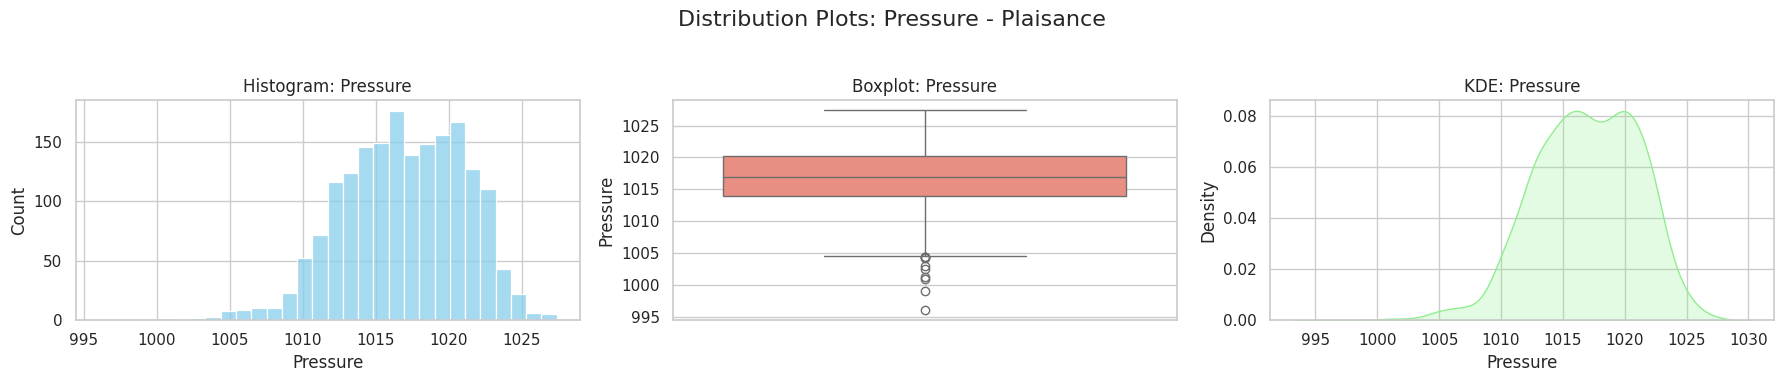

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Cotonou)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Plaisance", fontsize=16)

    # Histogram
    sns.histplot(df_plaisance[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_plaisance[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_plaisance[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

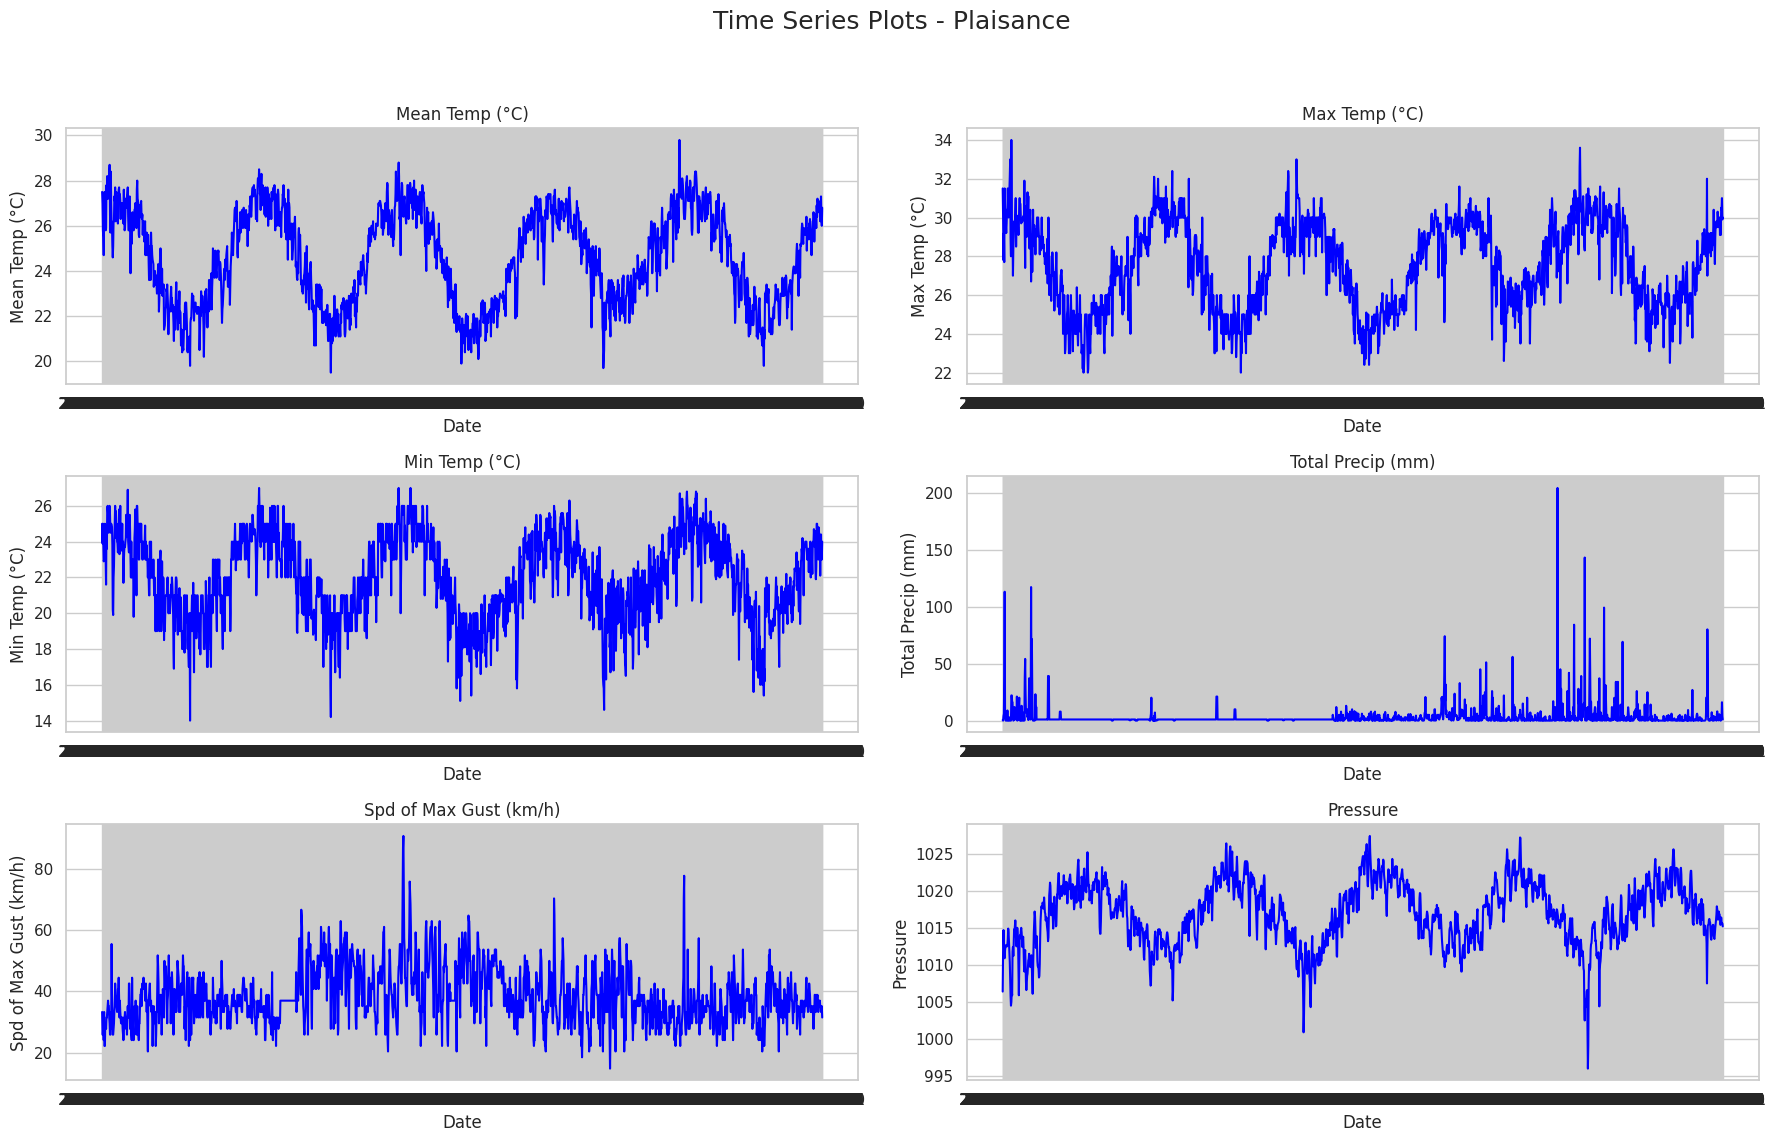

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Plaisance", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_plaisance['Date'], df_plaisance[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_plaisance = df_plaisance.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_plaisance.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_plaisance.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_plaisance = monthly_agg_plaisance.reset_index()

# Round numeric columns for readability
monthly_agg_plaisance[monthly_agg_plaisance.columns[2:]] = monthly_agg_plaisance.iloc[:, 2:].round(2)

monthly_agg_plaisance

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020.0    1.0              29.95              24.09               26.70   
1   2020.0    2.0              29.96              24.23               26.87   
2   2020.0    3.0              29.40              23.91               26.52   
3   2020.0    4.0              28.31              23.58               25.79   
4   2020.0    5.0              26.68              21.49               23.98   
5   2020.0    6.0              24.57              20.82               22.54   
6   2020.0    7.0              24.18              19.88               21.90   
7   2020.0    8.0              24.50              19.47               21.89   
8   2020.0    9.0              25.14              19.58               22.26   
9   2020.0   10.0              26.99              21.11               23.84   
10  2020.0   11.0              26.94              21.60               24.09   
11  2020.0   12.0              28.90              23.92               26.18   
12  2021.0    1.0              30.12              24.15               26.89   
13  2021.0    2.0              30.20              24.62               27.29   
14  2021.0    3.0              30.22              24.05               26.83   
15  2021.0    4.0              28.72              23.96               26.24   
16  2021.0    5.0              27.47              21.70               24.41   
17  2021.0    6.0              25.55              20.66               22.94   
18  2021.0    7.0              24.65              20.16               22.23   
19  2021.0    8.0              24.32              19.02               21.58   
20  2021.0    9.0              24.97              20.15               22.33   
21  2021.0   10.0              26.28              20.93               23.44   
22  2021.0   11.0              28.68              21.99               25.42   
23  2021.0   12.0              29.78              23.97               26.65   
24  2022.0    1.0              29.67              24.22               26.77   
25  2022.0    2.0              29.44              25.05               27.08   
26  2022.0    3.0              29.73              24.58               26.92   
27  2022.0    4.0              28.19              23.42               25.61   
28  2022.0    5.0              27.11              21.55               24.26   
29  2022.0    6.0              25.07              19.53               22.27   
30  2022.0    7.0              23.97              18.82               21.26   
31  2022.0    8.0              24.75              18.85               21.56   
32  2022.0    9.0              25.18              19.69               22.18   
33  2022.0   10.0              25.98              20.58               23.10   
34  2022.0   11.0              27.59              20.83               24.28   
35  2022.0   12.0              28.98              22.93               25.97   
36  2023.0    1.0              28.90              23.64               26.15   
37  2023.0    2.0              29.60              24.23               26.85   
38  2023.0    3.0              29.67              24.03               26.66   
39  2023.0    4.0              29.71              23.45               26.07   
40  2023.0    5.0              28.34              21.55               24.61   
41  2023.0    6.0              26.48              20.12               23.28   
42  2023.0    7.0              25.69              19.77               22.66   
43  2023.0    8.0              26.01              19.97               22.78   
44  2023.0    9.0              26.60              20.49               23.46   
45  2023.0   10.0              28.44              21.07               24.52   
46  2023.0   11.0              28.47              22.05               25.17   
47  2023.0   12.0              29.76              23.32               26.32   
48  2024.0    1.0              30.41              24.95               27.46   
49  2024.0    2.0              29.97              24.42 

In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_plaisance = df_plaisance.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_plaisance.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_plaisance.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_plaisance = yearly_agg_plaisance.reset_index()

# Round numeric columns for readability
yearly_agg_plaisance[yearly_agg_plaisance.columns[1:]] = yearly_agg_plaisance.iloc[:, 1:].round(2)

yearly_agg_plaisance

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020.0              27.12              21.97               24.37   
1  2021.0              27.56              22.10               24.67   
2  2022.0              27.13              21.65               24.26   
3  2023.0              28.13              21.96               24.87   
4  2024.0              27.71              22.23               24.74   

   Avg Spd of Max Gust (km/h)  Avg Pressure  Total Total Precip (mm)  
0                       35.66       1016.62                  1297.45  
1                       40.85       1017.04                   470.70  
2                       43.66       1017.12                   649.60  
3                       36.43       1017.08                  1969.90  
4                       35.52       1016.72                  1747.10

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.75            0.94   
Min Temp (°C)                    0.75           1.00            0.90   
Mean Temp (°C)                   0.94           0.90            1.00   
Pressure                        -0.76          -0.65           -0.77   
Total Precip (mm)                0.08           0.09            0.08   
Spd of Max Gust (km/h)          -0.33           0.00           -0.18   

                        Pressure  Total Precip (mm)  Spd of Max Gust (km/h)  
Max Temp (°C)              -0.76               0.08                   -0.33  
Min Temp (°C)              -0.65               0.09                    0.00  
Mean Temp (°C)             -0.77               0.08                   -0.18  
Pressure                    1.00              -0.17                    0.30  
Total Precip (mm)          -0.17               1.00                   -0.02  
Spd of Max Gust (km/h)     

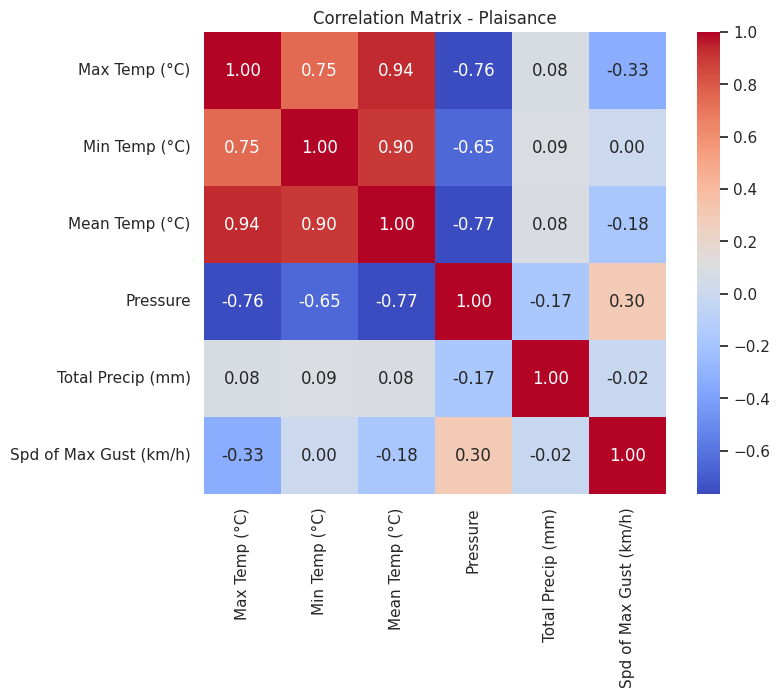

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Pressure', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_plaisance[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Plaisance")
plt.show()

---

---

**VACOAS**

In [ ]:
# SUMMARY STATISTICS

# Columns for Cotonou
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

df_city = df_vacoas[num_cols]

# 1. Basic descriptive stats with custom percentiles (10%, 25%, 50%, 75%, 90%)
summary_vacoas = df_city.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Keep only the columns we want
summary_vacoas= summary_vacoas[['count', 'mean', '25%', '50%', '75%', 'min', 'max', 'std', '10%', '90%']]
summary_vacoas.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# 2. IQR
summary_vacoas['IQR'] = (df_city.quantile(0.75) - df_city.quantile(0.25)).round(2)

# Round for readability
summary_vacoas = summary_vacoas.round(2)

summary_vacoas

count     mean       Q1  median       Q3    min  \
Max Temp (°C)           1827.0    25.08    23.45    25.3    26.60   18.6   
Min Temp (°C)           1827.0    19.17    17.60    19.4    20.80   11.9   
Mean Temp (°C)          1827.0    21.69    20.10    22.0    23.30   16.6   
Total Precip (mm)       1827.0     4.16     0.30     1.3     3.75    0.0   
Spd of Max Gust (km/h)  1827.0     0.00     0.00     0.0     0.00    0.0   
Pressure                1827.0  1017.32  1015.40  1017.4  1019.60  996.4   

                           max    std     10%     90%   IQR  
Max Temp (°C)             34.0   2.33    21.7    28.1  3.15  
Min Temp (°C)             24.4   2.15    16.0    21.9  3.20  
Mean Temp (°C)            26.6   2.10    18.6    24.2  3.20  
Total Precip (mm)        179.1  10.14     0.0     8.9  3.45  
Spd of Max Gust (km/h)     0.0   0.00     0.0     0.0  0.00  
Pressure                1026.7   3.53  1012.8  1022.0  4.20

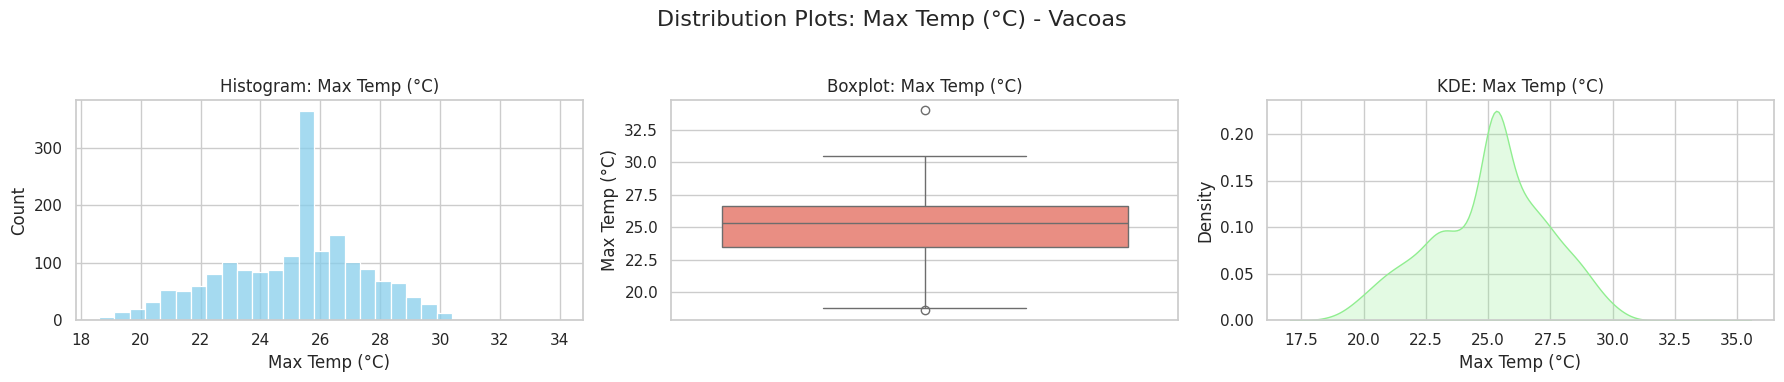

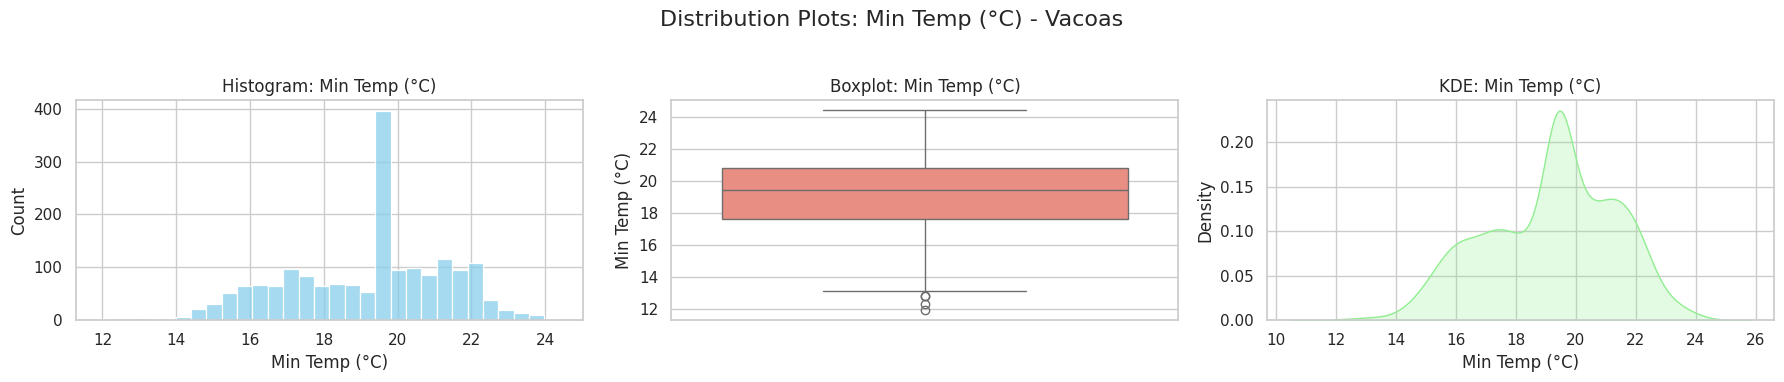

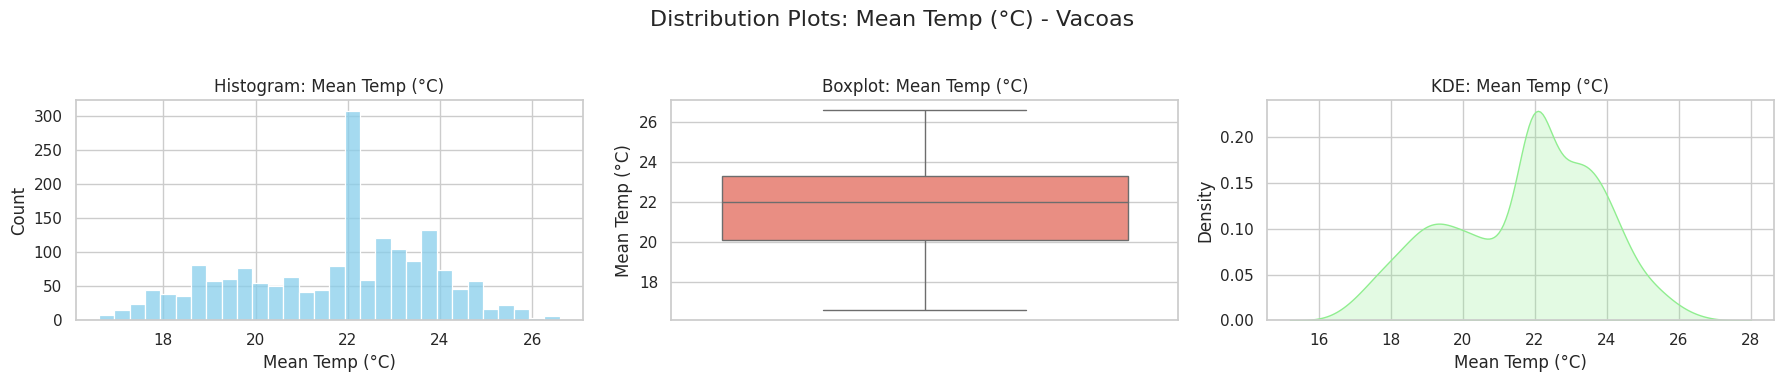

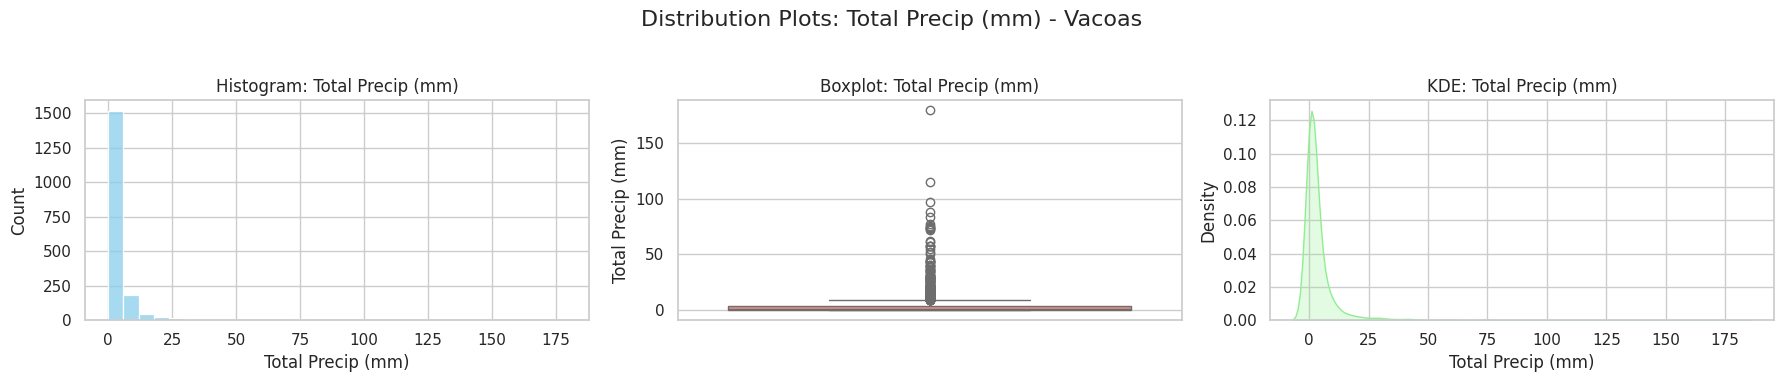

/tmp/ipython-input-386642838.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_vacoas[col], ax=axes[2], fill=True, color='lightgreen')


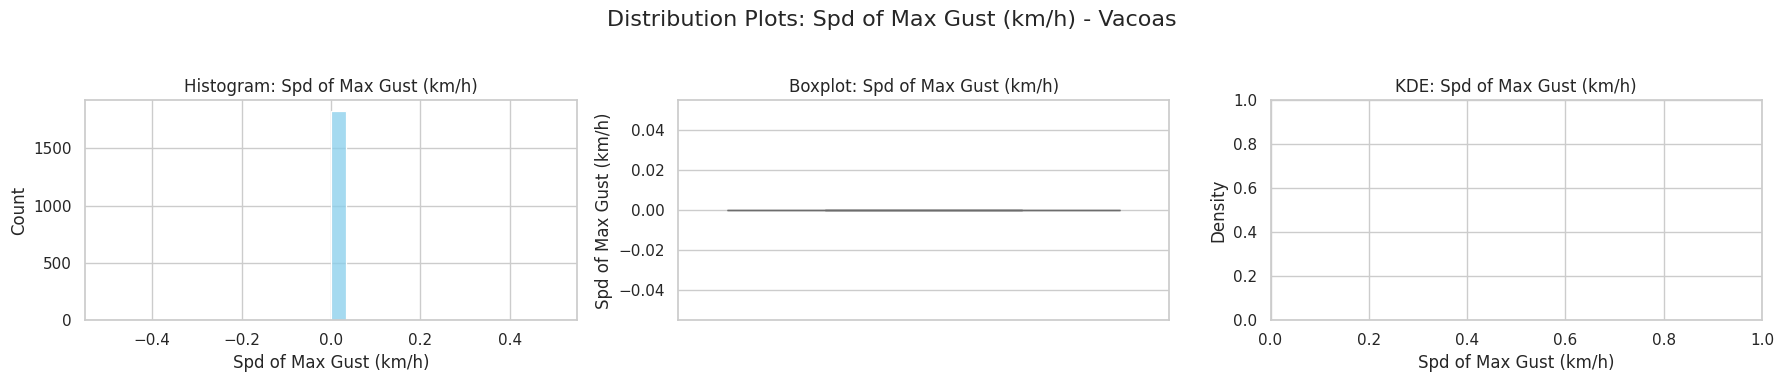

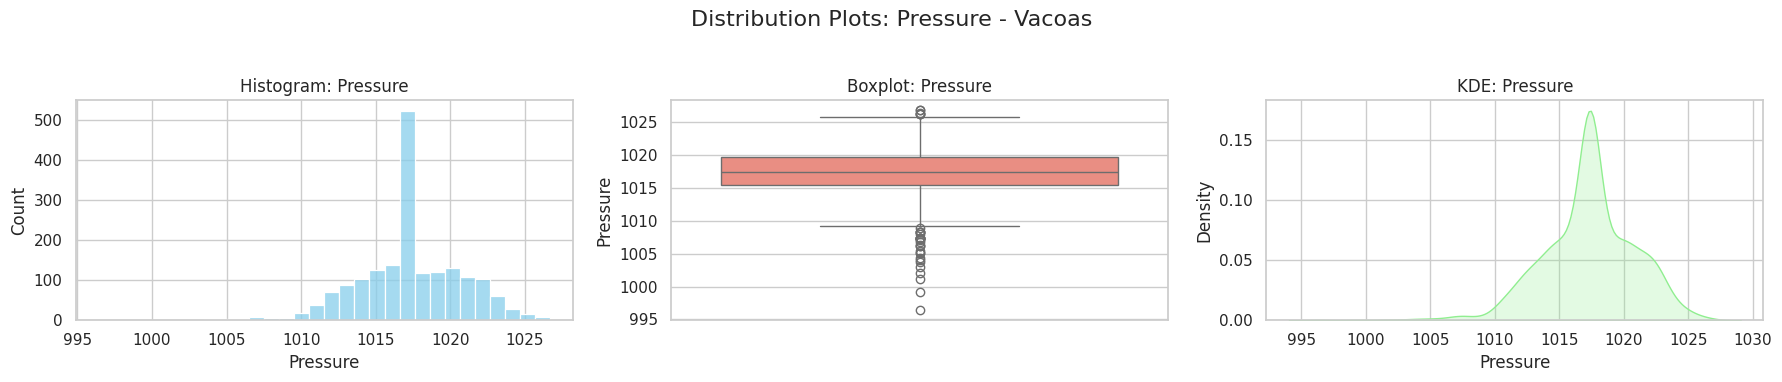

In [ ]:
# DISTRIBUTION PLOTS

# Columns to plot (numerical variables for Cotonou)
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through all numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    fig.suptitle(f"Distribution Plots: {col} - Vacoas", fontsize=16)

    # Histogram
    sns.histplot(df_vacoas[col], bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(y=df_vacoas[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot: {col}")

    # KDE
    sns.kdeplot(df_vacoas[col], ax=axes[2], fill=True, color='lightgreen')
    axes[2].set_title(f"KDE: {col}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

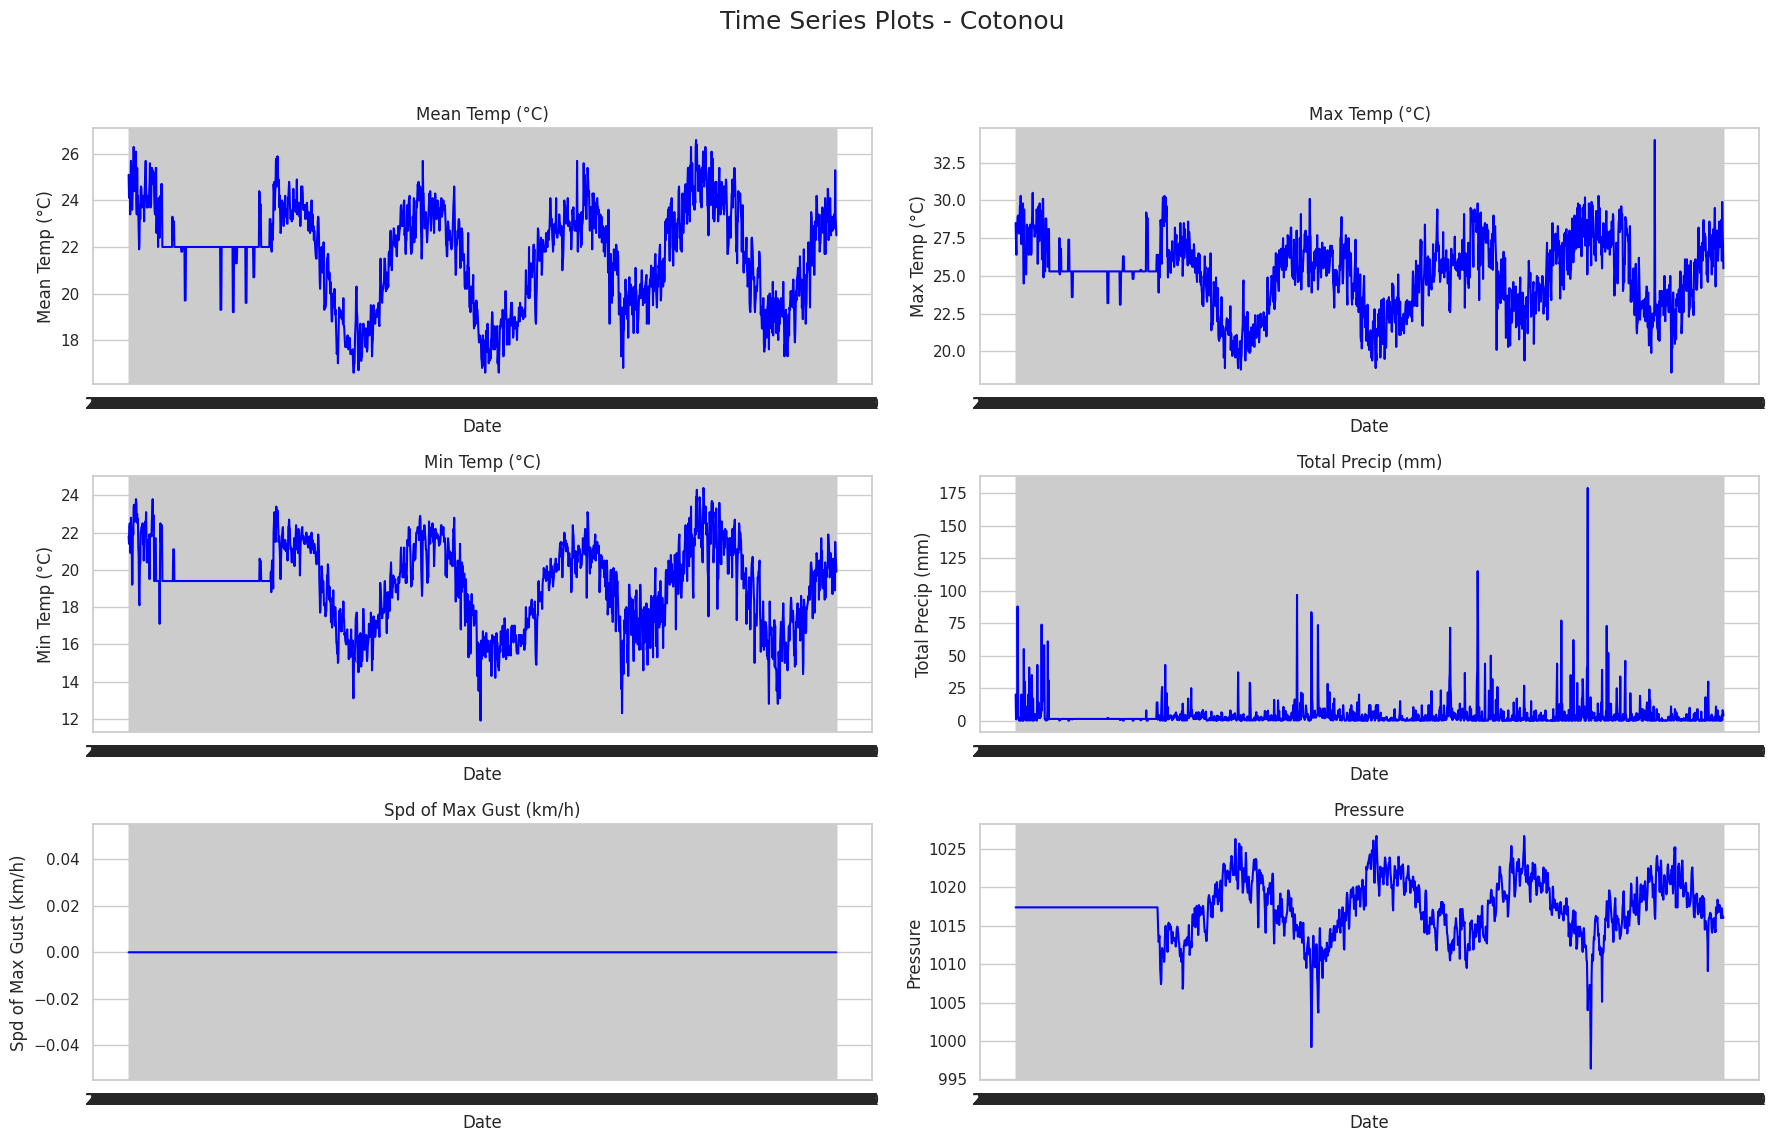

In [ ]:
# TIME SERIES PLOTS

# Columns to plot
cols_to_plot = ['Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)',
                'Total Precip (mm)', 'Spd of Max Gust (km/h)', 'Pressure']

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18,12))
fig.suptitle("Time Series Plots - Cotonou", fontsize=18)

for ax, col in zip(axes.flatten(), cols_to_plot):
    ax.plot(df_vacoas['Date'], df_vacoas[col], color='blue')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# MONTHLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year and Month and aggregate
monthly_agg_vacoas = df_vacoas.groupby(['Year', 'Month']).agg(agg_dict)

# Rename columns to indicate aggregation
monthly_agg_vacoas.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
monthly_agg_vacoas.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
monthly_agg_vacoas = monthly_agg_vacoas.reset_index()

# Round numeric columns for readability
monthly_agg_vacoas[monthly_agg_vacoas.columns[2:]] = monthly_agg_vacoas.iloc[:, 2:].round(2)

monthly_agg_vacoas

Year  Month  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0   2020      1              27.89              21.78               24.36   
1   2020      2              28.03              21.65               24.26   
2   2020      3              27.45              20.70               23.80   
3   2020      4              25.49              19.57               22.15   
4   2020      5              25.34              19.40               21.76   
5   2020      6              25.30              19.40               22.00   
6   2020      7              25.30              19.40               22.00   
7   2020      8              25.10              19.40               21.74   
8   2020      9              25.08              19.40               21.72   
9   2020     10              25.35              19.40               21.70   
10  2020     11              25.31              19.40               21.87   
11  2020     12              25.95              19.54               22.38   
12  2021      1              27.61              21.31               23.91   
13  2021      2              26.49              21.40               23.61   
14  2021      3              26.93              21.46               23.85   
15  2021      4              25.28              21.34               22.87   
16  2021      5              24.09              19.29               21.25   
17  2021      6              21.79              17.36               19.22   
18  2021      7              20.57              16.52               18.14   
19  2021      8              20.96              15.87               18.01   
20  2021      9              21.42              16.36               18.47   
21  2021     10              23.13              17.83               20.10   
22  2021     11              25.90              19.11               22.09   
23  2021     12              26.25              20.46               23.03   
24  2022      1              26.59              21.19               23.51   
25  2022      2              25.76              21.41               23.32   
26  2022      3              26.07              21.65               23.47   
27  2022      4              25.50              20.58               22.47   
28  2022      5              25.21              18.80               21.43   
29  2022      6              22.50              16.40               18.94   
30  2022      7              20.97              15.87               17.79   
31  2022      8              22.26              15.84               18.36   
32  2022      9              22.48              16.20               18.70   
33  2022     10              23.25              16.56               19.55   
34  2022     11              24.96              17.67               21.10   
35  2022     12              25.84              19.55               22.34   
36  2023      1              25.33              20.60               22.72   
37  2023      2              25.90              20.77               23.08   
38  2023      3              26.83              20.99               23.56   
39  2023      4              27.70              20.93               23.51   
40  2023      5              26.41              19.49               22.13   
41  2023      6              23.70              17.40               20.13   
42  2023      7              22.86              17.07               19.67   
43  2023      8              23.25              17.16               19.89   
44  2023      9              23.94              17.58               20.43   
45  2023     10              26.13              18.61               21.97   
46  2023     11              26.50              19.82               22.79   
47  2023     12              27.77              21.09               24.30   
48  2024      1              28.31              22.62               25.20   
49  2024      2              27.60              21.67               24.29   
50  2024      3              27.05              21.36               23.74   


In [ ]:
# YEARLY AGGREGATES

# Columns to sum vs average
sum_cols = ['Total Precip (mm)']
mean_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Spd of Max Gust (km/h)', 'Pressure']

# Aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

# Group by Year for yearly aggregates
yearly_agg_vacoas = df_vacoas.groupby('Year').agg(agg_dict)

# Rename columns to indicate aggregation
yearly_agg_vacoas.rename(columns={col: f"Avg {col}" for col in mean_cols}, inplace=True)
yearly_agg_vacoas.rename(columns={col: f"Total {col}" for col in sum_cols}, inplace=True)

# Reset index for a clean table
yearly_agg_vacoas = yearly_agg_vacoas.reset_index()

# Round numeric columns for readability
yearly_agg_vacoas[yearly_agg_vacoas.columns[1:]] = yearly_agg_vacoas.iloc[:, 1:].round(2)

yearly_agg_vacoas

Year  Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Mean Temp (°C)  \
0  2020              25.96              19.92               22.47   
1  2021              24.19              19.01               21.20   
2  2022              24.27              18.46               20.90   
3  2023              25.52              19.28               22.01   
4  2024              25.44              19.16               21.88   

   Avg Spd of Max Gust (km/h)  Avg Pressure  Total Total Precip (mm)  
0                         0.0       1017.40                  1436.55  
1                         0.0       1017.37                  1268.00  
2                         0.0       1017.27                  1470.80  
3                         0.0       1017.44                  1893.70  
4                         0.0       1017.11                  1534.00

                        Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
Max Temp (°C)                    1.00           0.76            0.92   
Min Temp (°C)                    0.76           1.00            0.92   
Mean Temp (°C)                   0.92           0.92            1.00   
Pressure                        -0.64          -0.72           -0.74   
Total Precip (mm)                0.08           0.21            0.15   
Spd of Max Gust (km/h)            NaN            NaN             NaN   

                        Pressure  Total Precip (mm)  Spd of Max Gust (km/h)  
Max Temp (°C)              -0.64               0.08                     NaN  
Min Temp (°C)              -0.72               0.21                     NaN  
Mean Temp (°C)             -0.74               0.15                     NaN  
Pressure                    1.00              -0.21                     NaN  
Total Precip (mm)          -0.21               1.00                     NaN  
Spd of Max Gust (km/h)     

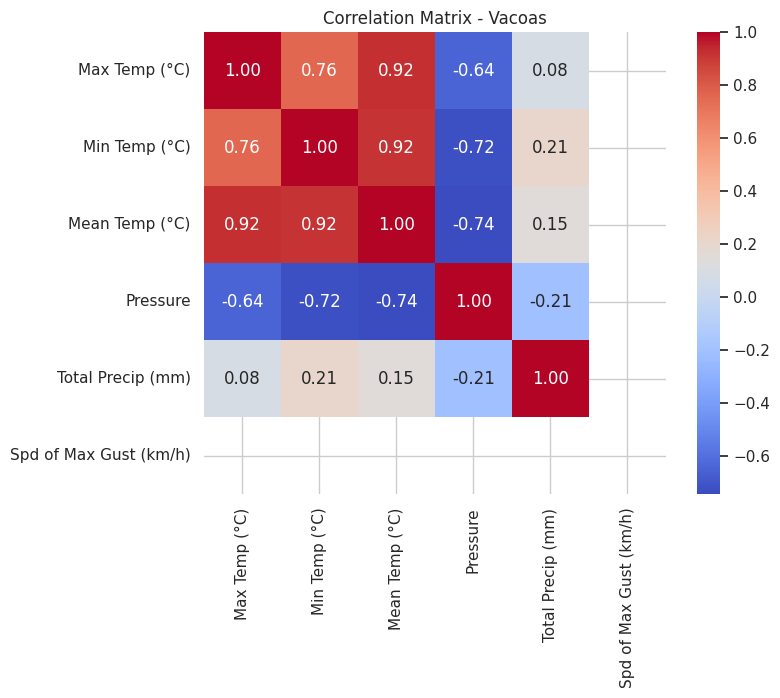

In [ ]:
# CORRELATION

# Select numerical columns for correlation
num_cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
            'Pressure', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']

df_numeric = df_vacoas[num_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Vacoas")
plt.show()